# House Price Prediction
---
*By Harsh R* 

## Table of Contents
* [Introduction](#Introduction)
* [Objective](#Objective)
* [Business Goal](#Business-Goal)
* [Data Understanding](#Data-Understanding)
* [Data Preprocessing](#Data-Preprocessing)
* [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-(EDA))
* [Feature Engineering](#Feature-Engineering)
    * [Encoding Categorical Variables](#Encoding-Categorical-Variables)
    * [Scaling Numerical Features](#Scaling-Numerical-Features)
* [Model Building](#Model-Building)
    * [Feature Selection](#Feature-Selection)
* [Hyperparameter Tuning](#Hyperparameter-Tuning)
* [Model Evaluation](#Model-Evaluation)
* [Result](#Result)

## Introduction

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

## Objective

The company wants to know:
-   Which variables are significant in predicting the price of a house, and
-   How well those variables describe the price of a house.

## Business Goal

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_rows=300
pd.options.display.max_columns=300

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from IPython.display import Markdown as md

## Data Understanding

In [4]:
data = pd.read_csv('train.csv')
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [5]:
with open('data description.txt') as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

## Data Preprocessing

In [6]:
# Removind 'ID' column because it is redundant
data.drop(columns='Id', inplace=True)

In [7]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'column_name': data.columns,
                                 'percent_missing': percent_missing}).sort_values('percent_missing', ascending=False)
missing_value_df

column_name  percent_missing
PoolQC                PoolQC        99.520548
MiscFeature      MiscFeature        96.301370
Alley                  Alley        93.767123
Fence                  Fence        80.753425
FireplaceQu      FireplaceQu        47.260274
LotFrontage      LotFrontage        17.739726
GarageYrBlt      GarageYrBlt         5.547945
GarageCond        GarageCond         5.547945
GarageType        GarageType         5.547945
GarageFinish    GarageFinish         5.547945
GarageQual        GarageQual         5.547945
BsmtExposure    BsmtExposure         2.602740
BsmtFinType2    BsmtFinType2         2.602740
BsmtCond            BsmtCond         2.534247
BsmtQual            BsmtQual         2.534247
BsmtFinType1    BsmtFinType1         2.534247
MasVnrArea        MasVnrArea         0.547945
MasVnrType        MasVnrType         0.547945
Electrical        Electrical         0.068493
MSSubClass        MSSubClass         0.000000
Fireplaces        Fireplaces         0.000000
Functional        Functional         0.000000
KitchenQual      KitchenQual         0.000000
KitchenAbvGr    KitchenAbvGr         0.000000
BedroomAbvGr    BedroomAbvGr         0.000000
HalfBath            HalfBath         0.000000
FullBath            FullBath         0.000000
BsmtHalfBath    BsmtHalfBath         0.000000
TotRmsAbvGrd    TotRmsAbvGrd         0.000000
GarageCars        GarageCars         0.000000
GrLivArea          GrLivArea         0.000000
GarageArea        GarageArea         0.000000
PavedDrive        PavedDrive         0.000000
WoodDeckSF        WoodDeckSF         0.000000
OpenPorchSF      OpenPorchSF         0.000000
EnclosedPorch  EnclosedPorch         0.000000
3SsnPorch          3SsnPorch         0.000000
ScreenPorch      ScreenPorch         0.000000
PoolArea            PoolArea         0.000000
MiscVal              MiscVal         0.000000
MoSold                MoSold         0.000000
YrSold                YrSold         0.000000
SaleType            SaleType         0.000000
SaleCondition  SaleCondition         0.000000
BsmtFullBath    BsmtFullBath         0.000000
CentralAir        CentralAir         0.000000
LowQualFinSF    LowQualFinSF         0.000000
Neighborhood    Neighborhood         0.000000
OverallCond      OverallCond         0.000000
OverallQual      OverallQual         0.000000
HouseStyle        HouseStyle         0.000000
BldgType            BldgType         0.000000
Condition2        Condition2         0.000000
Condition1        Condition1         0.000000
LandSlope          LandSlope         0.000000
2ndFlrSF            2ndFlrSF         0.000000
LotConfig          LotConfig         0.000000
Utilities          Utilities         0.000000
LandContour      LandContour         0.000000
LotShape            LotShape         0.000000
Street                Street         0.000000
LotArea              LotArea         0.000000
YearBuilt          YearBuilt         0.000000
YearRemodAdd    YearRemodAdd         0.000000
RoofStyle          RoofStyle         0.000000
RoofMatl            RoofMatl         0.000000
Exterior1st      Exterior1st         0.000000
Exterior2nd      Exterior2nd         0.000000
ExterQual          ExterQual         0.000000
ExterCond          ExterCond         0.000000
Foundation        Foundation         0.000000
BsmtFinSF1        BsmtFinSF1         0.000000
BsmtFinSF2        BsmtFinSF2         0.000000
BsmtUnfSF          BsmtUnfSF         0.000000
TotalBsmtSF      TotalBsmtSF         0.000000
Heating              Heating         0.000000
HeatingQC          HeatingQC         0.000000
MSZoning            MSZoning         0.000000
1stFlrSF            1stFlrSF         0.000000
SalePrice          SalePrice         0.000000

From the data description we can find that many of the columns have 'NA' as a category and pandas reads them as a null value. Lets replace them first.

In [8]:
columns_with_NA = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
                   'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 
                   'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

In [9]:
for col in columns_with_NA:
    data[col].fillna('None', inplace=True)

In [10]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'column_name': data.columns,
                                 'percent_missing': percent_missing}).sort_values('percent_missing', ascending=False)
missing_value_df

column_name  percent_missing
LotFrontage      LotFrontage        17.739726
GarageYrBlt      GarageYrBlt         5.547945
MasVnrArea        MasVnrArea         0.547945
MasVnrType        MasVnrType         0.547945
Electrical        Electrical         0.068493
GrLivArea          GrLivArea         0.000000
BsmtFullBath    BsmtFullBath         0.000000
BsmtHalfBath    BsmtHalfBath         0.000000
FullBath            FullBath         0.000000
HalfBath            HalfBath         0.000000
GarageFinish    GarageFinish         0.000000
KitchenAbvGr    KitchenAbvGr         0.000000
KitchenQual      KitchenQual         0.000000
TotRmsAbvGrd    TotRmsAbvGrd         0.000000
Functional        Functional         0.000000
Fireplaces        Fireplaces         0.000000
FireplaceQu      FireplaceQu         0.000000
GarageType        GarageType         0.000000
LowQualFinSF    LowQualFinSF         0.000000
2ndFlrSF            2ndFlrSF         0.000000
BedroomAbvGr    BedroomAbvGr         0.000000
MSSubClass        MSSubClass         0.000000
1stFlrSF            1stFlrSF         0.000000
GarageArea        GarageArea         0.000000
SaleCondition  SaleCondition         0.000000
SaleType            SaleType         0.000000
YrSold                YrSold         0.000000
MoSold                MoSold         0.000000
MiscVal              MiscVal         0.000000
MiscFeature      MiscFeature         0.000000
Fence                  Fence         0.000000
PoolQC                PoolQC         0.000000
PoolArea            PoolArea         0.000000
ScreenPorch      ScreenPorch         0.000000
3SsnPorch          3SsnPorch         0.000000
EnclosedPorch  EnclosedPorch         0.000000
OpenPorchSF      OpenPorchSF         0.000000
WoodDeckSF        WoodDeckSF         0.000000
PavedDrive        PavedDrive         0.000000
GarageCond        GarageCond         0.000000
GarageQual        GarageQual         0.000000
GarageCars        GarageCars         0.000000
CentralAir        CentralAir         0.000000
MSZoning            MSZoning         0.000000
YearRemodAdd    YearRemodAdd         0.000000
OverallCond      OverallCond         0.000000
OverallQual      OverallQual         0.000000
HouseStyle        HouseStyle         0.000000
BldgType            BldgType         0.000000
Condition2        Condition2         0.000000
Condition1        Condition1         0.000000
Neighborhood    Neighborhood         0.000000
LandSlope          LandSlope         0.000000
LotConfig          LotConfig         0.000000
Utilities          Utilities         0.000000
LandContour      LandContour         0.000000
LotShape            LotShape         0.000000
Alley                  Alley         0.000000
Street                Street         0.000000
LotArea              LotArea         0.000000
YearBuilt          YearBuilt         0.000000
RoofStyle          RoofStyle         0.000000
HeatingQC          HeatingQC         0.000000
RoofMatl            RoofMatl         0.000000
Heating              Heating         0.000000
TotalBsmtSF      TotalBsmtSF         0.000000
BsmtUnfSF          BsmtUnfSF         0.000000
BsmtFinSF2        BsmtFinSF2         0.000000
BsmtFinType2    BsmtFinType2         0.000000
BsmtFinSF1        BsmtFinSF1         0.000000
BsmtFinType1    BsmtFinType1         0.000000
BsmtExposure    BsmtExposure         0.000000
BsmtCond            BsmtCond         0.000000
BsmtQual            BsmtQual         0.000000
Foundation        Foundation         0.000000
ExterCond          ExterCond         0.000000
ExterQual          ExterQual         0.000000
Exterior2nd      Exterior2nd         0.000000
Exterior1st      Exterior1st         0.000000
SalePrice          SalePrice         0.000000

In [11]:
data[missing_value_df.head(5).index].describe()

LotFrontage  GarageYrBlt   MasVnrArea
count  1201.000000  1379.000000  1452.000000
mean     70.049958  1978.506164   103.685262
std      24.284752    24.689725   181.066207
min      21.000000  1900.000000     0.000000
25%      59.000000  1961.000000     0.000000
50%      69.000000  1980.000000     0.000000
75%      80.000000  2002.000000   166.000000
max     313.000000  2010.000000  1600.000000

In [12]:
import matplotlib.pyplot as plt 
import seaborn as sns

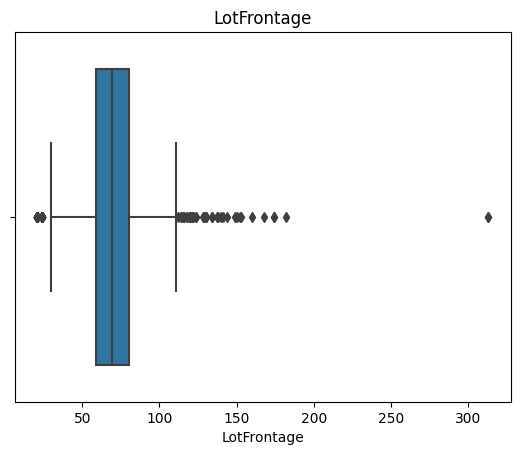

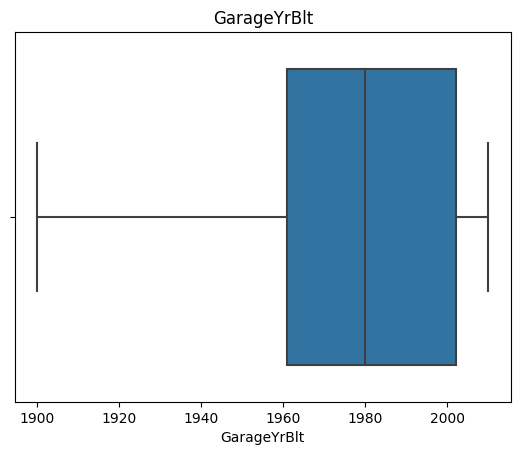

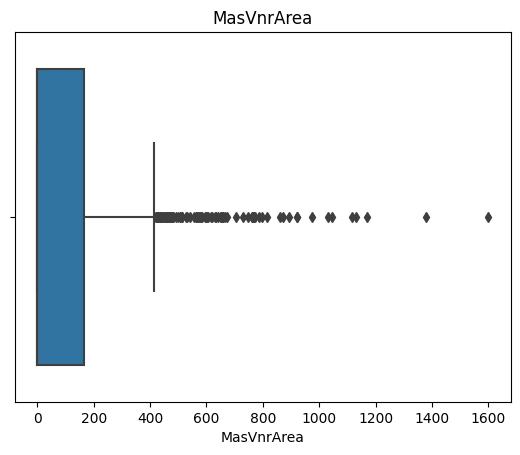

In [13]:
num_feat_missing = ['LotFrontage','GarageYrBlt', 'MasVnrArea'] # Numerical features with missing values.
for col in num_feat_missing:
    plt.title(col)
    sns.boxplot(x = data[col])
    plt.show()

Replacing the null values with the median of the respective columns.

In [14]:
data[num_feat_missing] = data[num_feat_missing].fillna(data[num_feat_missing].median())

Replacing null in categorical with mode of the column

In [15]:
cat_feat_missing = ['MasVnrType', 'Electrical']
data[cat_feat_missing].mode()

MasVnrType Electrical
0       None      SBrkr

In [16]:
data['MasVnrType'] = data['MasVnrType'].fillna('None')
data['Electrical'] = data['Electrical'].fillna('SBrkr')

In [17]:
# Lets Check missing values again
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'column_name': data.columns,
                                 'percent_missing': percent_missing}).sort_values('percent_missing', ascending=False)
missing_value_df

column_name  percent_missing
MSSubClass        MSSubClass              0.0
MSZoning            MSZoning              0.0
GarageYrBlt      GarageYrBlt              0.0
GarageType        GarageType              0.0
FireplaceQu      FireplaceQu              0.0
Fireplaces        Fireplaces              0.0
Functional        Functional              0.0
TotRmsAbvGrd    TotRmsAbvGrd              0.0
KitchenQual      KitchenQual              0.0
KitchenAbvGr    KitchenAbvGr              0.0
BedroomAbvGr    BedroomAbvGr              0.0
HalfBath            HalfBath              0.0
FullBath            FullBath              0.0
BsmtHalfBath    BsmtHalfBath              0.0
BsmtFullBath    BsmtFullBath              0.0
GrLivArea          GrLivArea              0.0
LowQualFinSF    LowQualFinSF              0.0
2ndFlrSF            2ndFlrSF              0.0
1stFlrSF            1stFlrSF              0.0
GarageFinish    GarageFinish              0.0
GarageCars        GarageCars              0.0
GarageArea        GarageArea              0.0
PoolQC                PoolQC              0.0
SaleCondition  SaleCondition              0.0
SaleType            SaleType              0.0
YrSold                YrSold              0.0
MoSold                MoSold              0.0
MiscVal              MiscVal              0.0
MiscFeature      MiscFeature              0.0
Fence                  Fence              0.0
PoolArea            PoolArea              0.0
GarageQual        GarageQual              0.0
ScreenPorch      ScreenPorch              0.0
3SsnPorch          3SsnPorch              0.0
EnclosedPorch  EnclosedPorch              0.0
OpenPorchSF      OpenPorchSF              0.0
WoodDeckSF        WoodDeckSF              0.0
PavedDrive        PavedDrive              0.0
GarageCond        GarageCond              0.0
Electrical        Electrical              0.0
CentralAir        CentralAir              0.0
HeatingQC          HeatingQC              0.0
LandSlope          LandSlope              0.0
OverallCond      OverallCond              0.0
OverallQual      OverallQual              0.0
HouseStyle        HouseStyle              0.0
BldgType            BldgType              0.0
Condition2        Condition2              0.0
Condition1        Condition1              0.0
Neighborhood    Neighborhood              0.0
LotConfig          LotConfig              0.0
YearRemodAdd    YearRemodAdd              0.0
Utilities          Utilities              0.0
LandContour      LandContour              0.0
LotShape            LotShape              0.0
Alley                  Alley              0.0
Street                Street              0.0
LotArea              LotArea              0.0
LotFrontage      LotFrontage              0.0
YearBuilt          YearBuilt              0.0
RoofStyle          RoofStyle              0.0
Heating              Heating              0.0
BsmtCond            BsmtCond              0.0
TotalBsmtSF      TotalBsmtSF              0.0
BsmtUnfSF          BsmtUnfSF              0.0
BsmtFinSF2        BsmtFinSF2              0.0
BsmtFinType2    BsmtFinType2              0.0
BsmtFinSF1        BsmtFinSF1              0.0
BsmtFinType1    BsmtFinType1              0.0
BsmtExposure    BsmtExposure              0.0
BsmtQual            BsmtQual              0.0
RoofMatl            RoofMatl              0.0
Foundation        Foundation              0.0
ExterCond          ExterCond              0.0
ExterQual          ExterQual              0.0
MasVnrArea        MasVnrArea              0.0
MasVnrType        MasVnrType              0.0
Exterior2nd      Exterior2nd              0.0
Exterior1st      Exterior1st              0.0
SalePrice          SalePrice              0.0

In [18]:
numerical_columns = data.describe().columns.tolist()
len(numerical_columns)

37

In [19]:
num_features_df = data[numerical_columns]

In [20]:
year_features = [feature for feature in data.columns if 'yr' in feature.lower() or 'year' in feature.lower()]

In [21]:
ordinal_vars = [feature for feature in num_features_df.columns \
                    if len(num_features_df[feature].unique())<25 \
                        and feature not in year_features]
ordinal_vars = list(set(ordinal_vars) - set(year_features))

In [22]:
continous_vars = list(set(num_features_df.columns.tolist()) - set(ordinal_vars))
continous_vars = list(set(continous_vars) - set(year_features))

In [23]:
categorical_vars = set(data.columns.tolist()) - set(continous_vars) - set(ordinal_vars) - set(data.select_dtypes(exclude=['object']).columns.tolist())
categorical_vars = list(set(categorical_vars).union(year_features))

## Exploratory Data Analysis (EDA)

In [24]:
data[continous_vars].describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

GrLivArea      SalePrice   BsmtFinSF2  EnclosedPorch        LotArea  \
count  1460.000000    1460.000000  1460.000000    1460.000000    1460.000000   
mean   1515.463699  180921.195890    46.549315      21.954110   10516.828082   
std     525.480383   79442.502883   161.319273      61.119149    9981.264932   
min     334.000000   34900.000000     0.000000       0.000000    1300.000000   
25%    1129.500000  129975.000000     0.000000       0.000000    7553.500000   
50%    1464.000000  163000.000000     0.000000       0.000000    9478.500000   
75%    1776.750000  214000.000000     0.000000       0.000000   11601.500000   
90%    2158.300000  278000.000000   117.200000     112.000000   14381.700000   
95%    2466.100000  326100.000000   396.200000     180.150000   17401.150000   
99%    3123.480000  442567.010000   830.380000     261.050000   37567.640000   
max    5642.000000  755000.000000  1474.000000     552.000000  215245.000000   

       ScreenPorch  TotalBsmtSF   MasVnrArea     2ndFlrSF   GarageArea  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     15.060959  1057.429452   103.117123   346.992466   472.980137   
std      55.757415   438.705324   180.731373   436.528436   213.804841   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000   795.750000     0.000000     0.000000   334.500000   
50%       0.000000   991.500000     0.000000     0.000000   480.000000   
75%       0.000000  1298.250000   164.250000   728.000000   576.000000   
90%       0.000000  1602.200000   335.000000   954.200000   757.100000   
95%     160.000000  1753.000000   456.000000  1141.050000   850.100000   
99%     268.050000  2155.050000   791.280000  1418.920000  1002.790000   
max     480.000000  6110.000000  1600.000000  2065.000000  1418.000000   

        WoodDeckSF    BsmtUnfSF  OpenPorchSF   BsmtFinSF1     1stFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     94.244521   567.240411    46.660274   443.639726  1162.626712   
std     125.338794   441.866955    66.256028   456.098091   386.587738   
min       0.000000     0.000000     0.000000     0.000000   334.000000   
25%       0.000000   223.000000     0.000000     0.000000   882.000000   
50%       0.000000   477.500000    25.000000   383.500000  1087.000000   
75%     168.000000   808.000000    68.000000   712.250000  1391.250000   
90%     262.000000  1232.000000   130.000000  1065.500000  1680.000000   
95%     335.000000  1468.000000   175.050000  1274.000000  1831.250000   
99%     505.460000  1797.050000   285.820000  1572.410000  2219.460000   
max     857.000000  2336.000000   547.000000  5644.000000  4692.000000   

       LotFrontage  
count  1460.000000  
mean     69.863699  
std      22.027677  
min      21.000000  
25%      60.000000  
50%      69.000000  
75%      79.000000  
90%      92.000000  
95%     104.000000  
99%     137.410000  
max     313.000000

<Axes: >

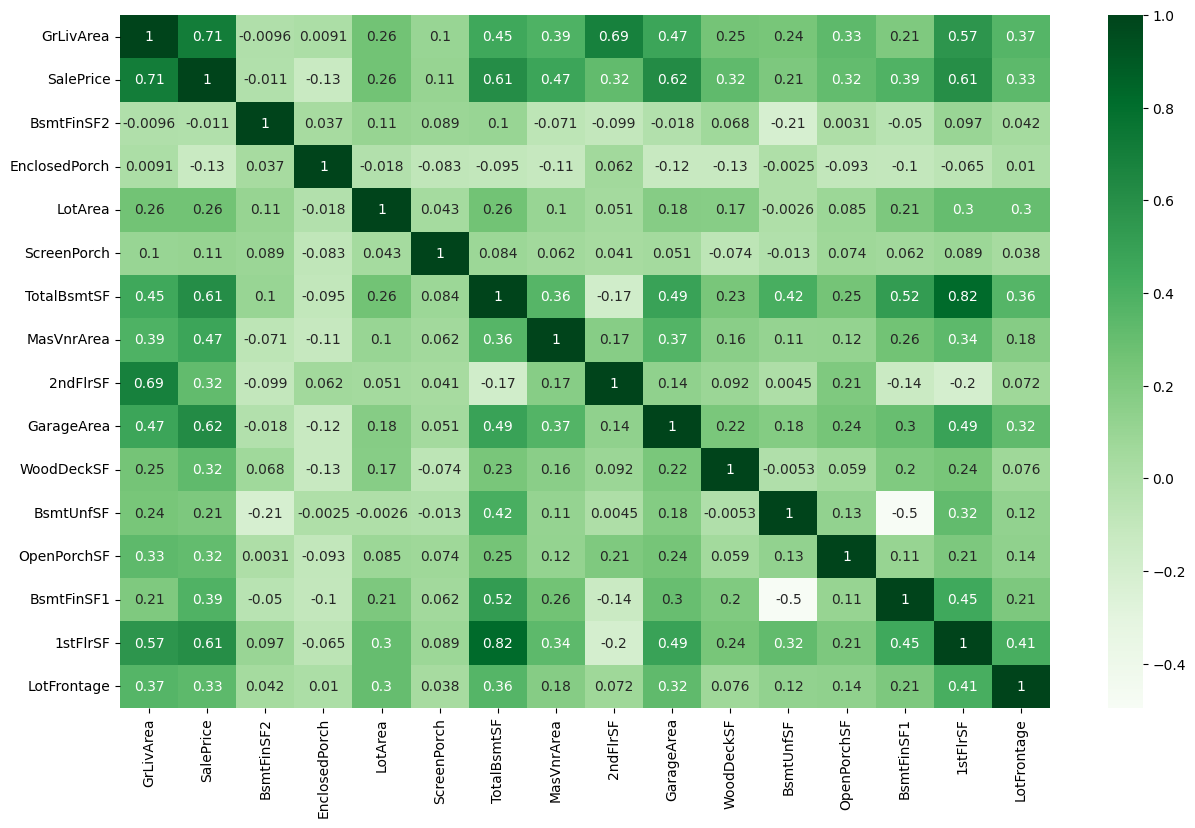

In [25]:
# check correlations
fig, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(data[continous_vars].corr(), cmap='Greens', annot=True, ax=ax)

`TotalBsmtSF` and `1stFlrSF` are highly correlated. We may have to drop one of these.

In [26]:
continous_vars.remove('1stFlrSF')

<Figure size 100x1000 with 0 Axes>

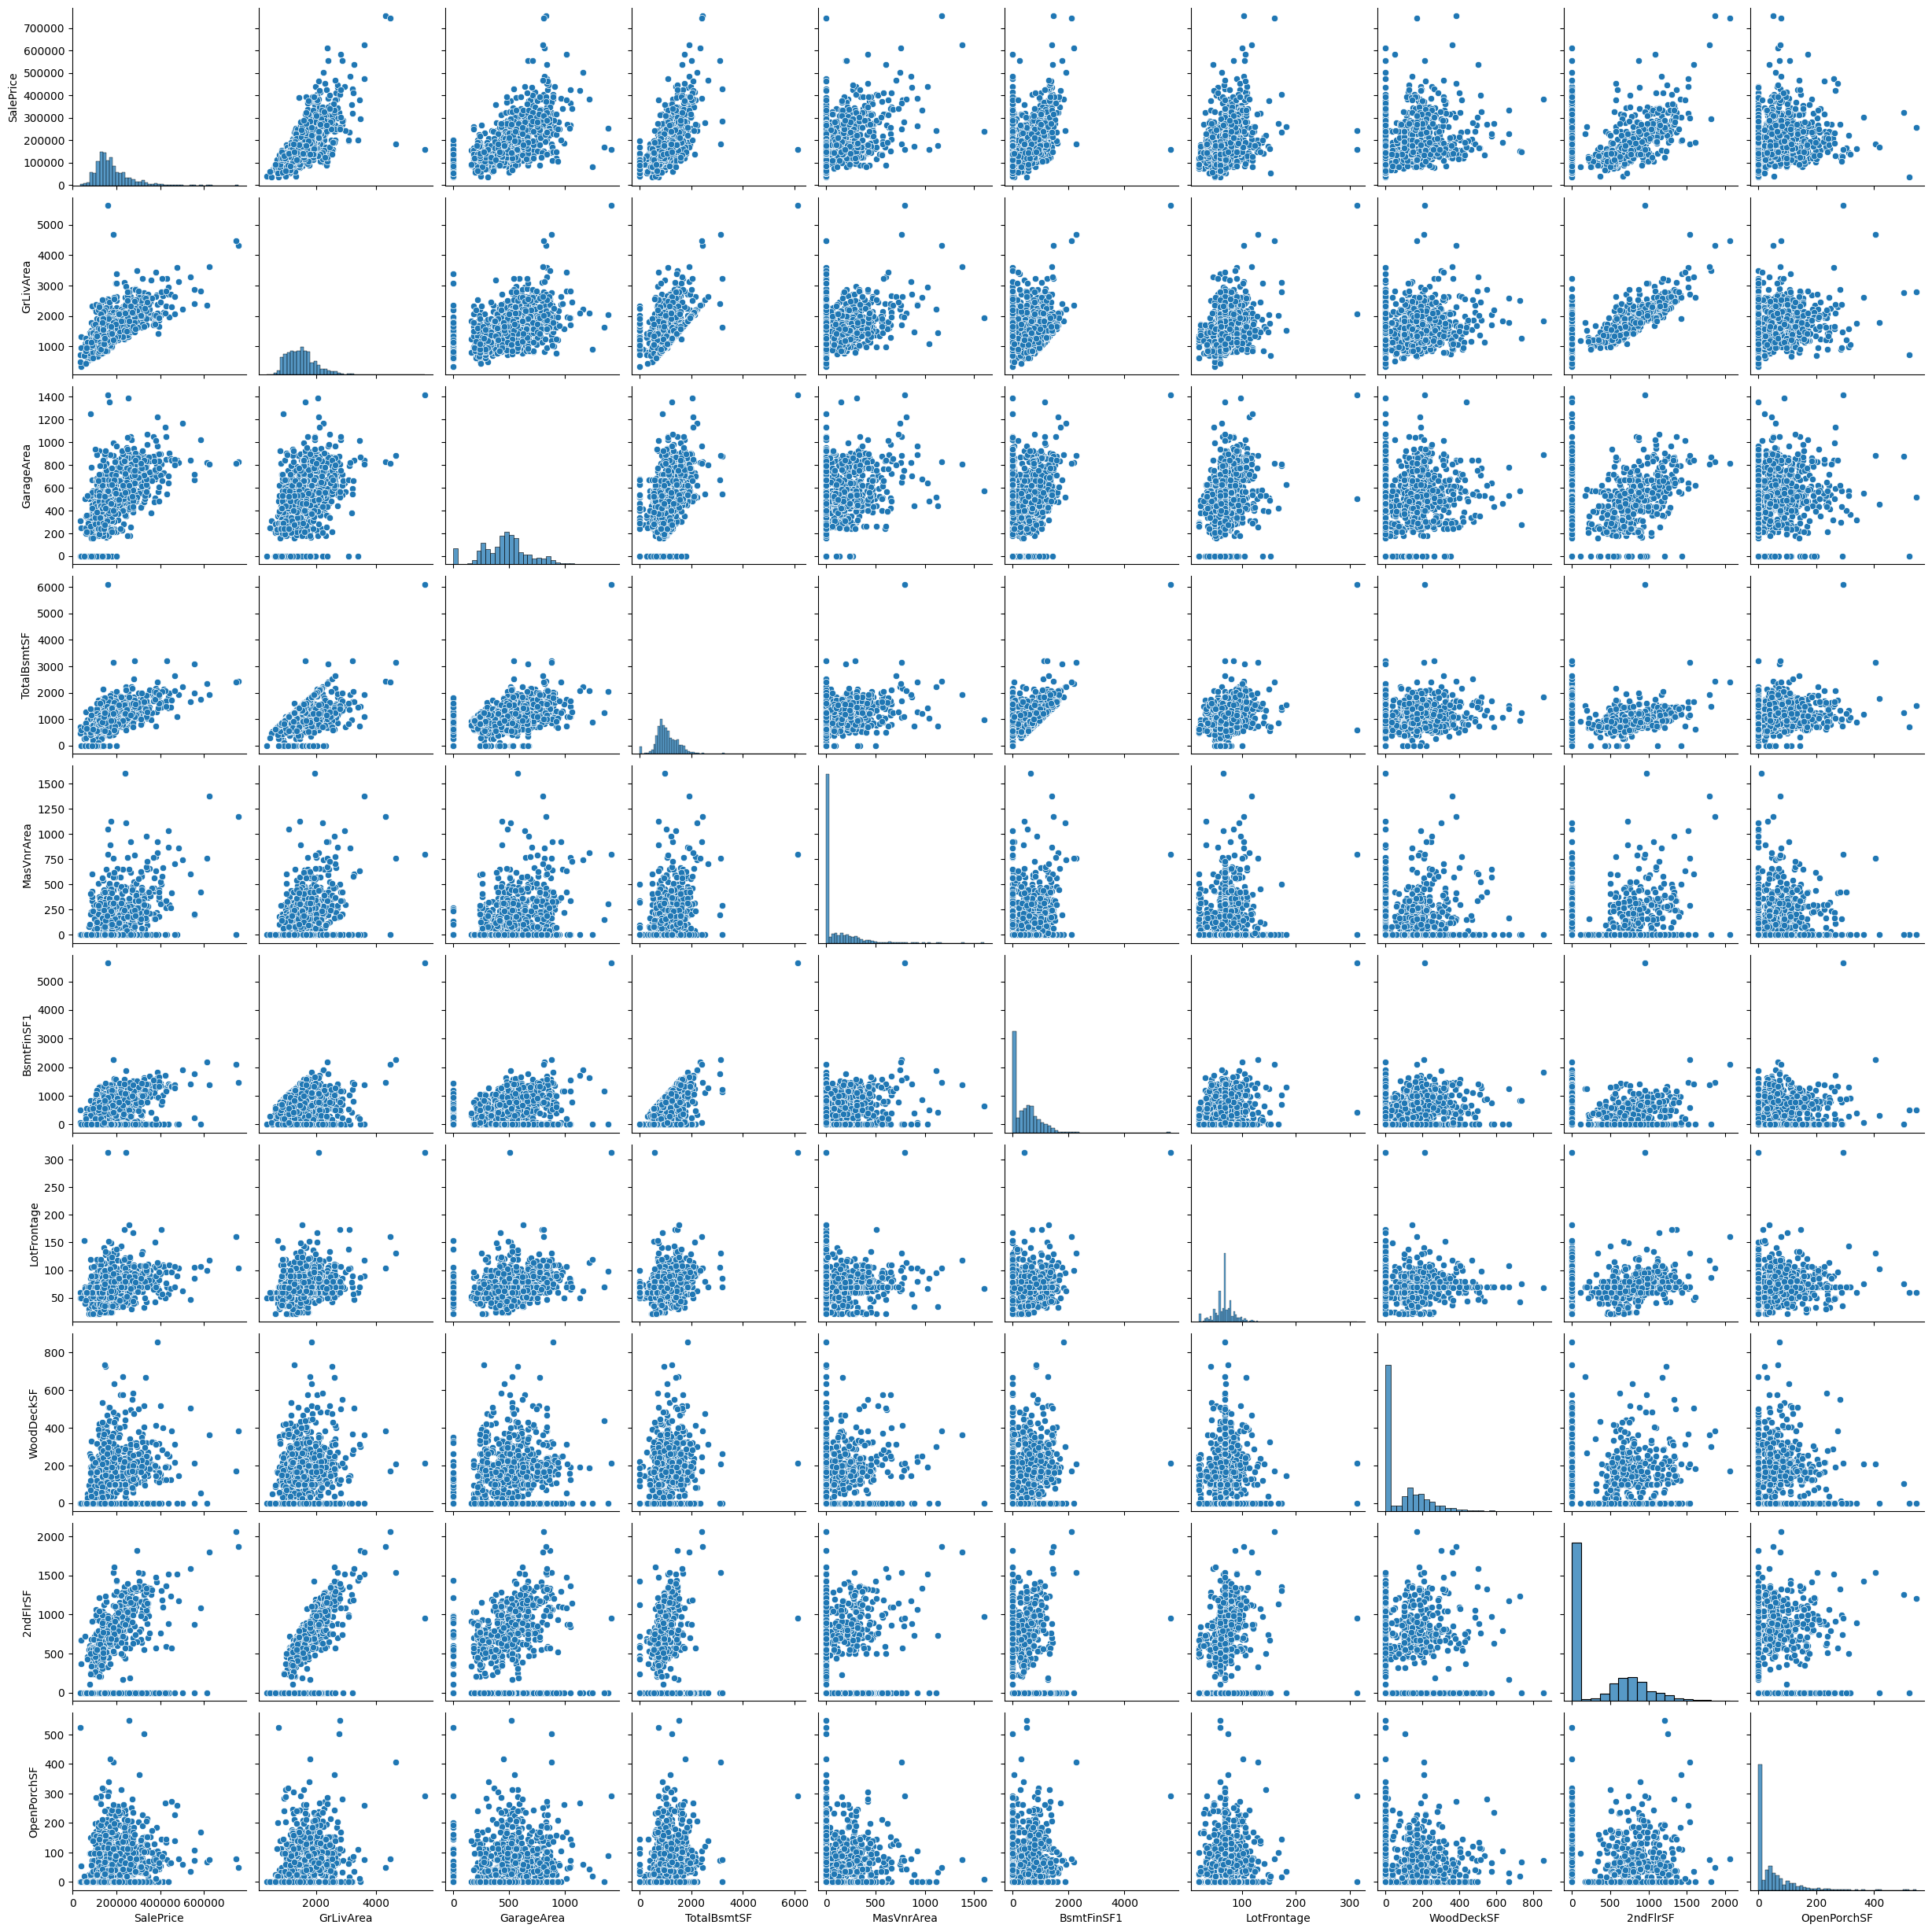

In [27]:
cols = data[continous_vars].corr().nlargest(10, 'SalePrice')['SalePrice'].index

plt.figure(figsize=(1,10))
sns.pairplot(data[cols])
plt.show()

If we look at scatter plots w.r.t SalePrice, most of the features are somewhat having linear relationship with SalePrice.

In [28]:
def plot_categorical_feature(df, feature,rotate_xticks=False):
    
    # temp = df[feature].value_counts(normalize=True)*100
    temp = df[feature].value_counts()
    temp_df = pd.DataFrame({'percentages':temp})
    temp_df.sort_values(by = 'percentages', inplace=True,ascending=False)

    # print(temp_df)

    plt.figure(figsize=(12,7))
    plt.title(f'Category distribution for {feature}',fontsize=18)
    splot = sns.barplot(x = temp_df.index , y = temp_df.percentages,order = temp_df.index)
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.2f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')
    plt.xlabel(feature,fontsize=18)
    if rotate_xticks:
        plt.xticks(rotation = 90)
    plt.ylabel('Percentage',fontsize=18)                
    plt.show()

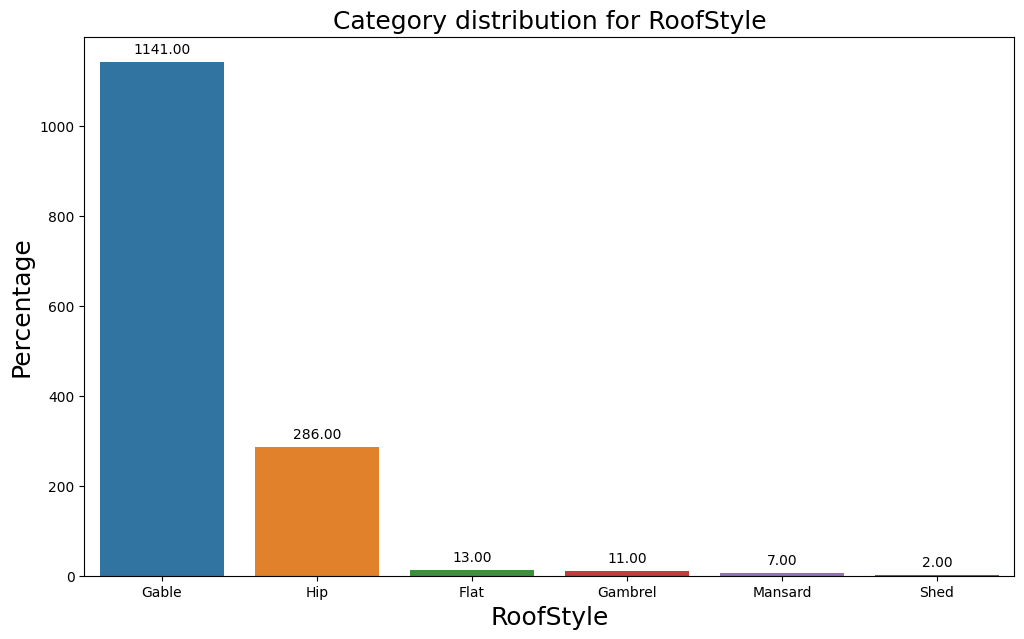

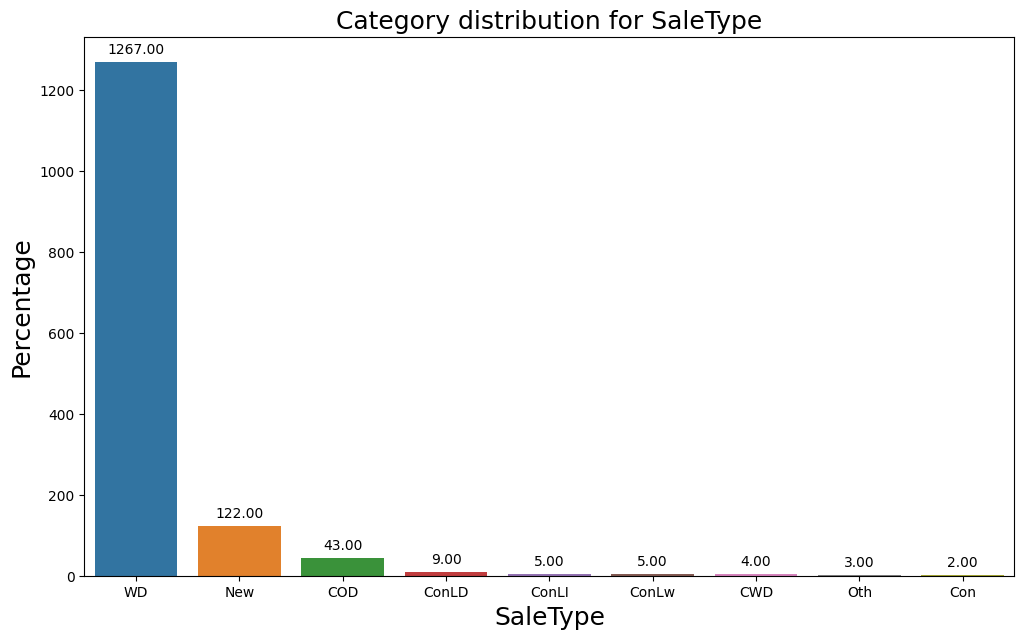

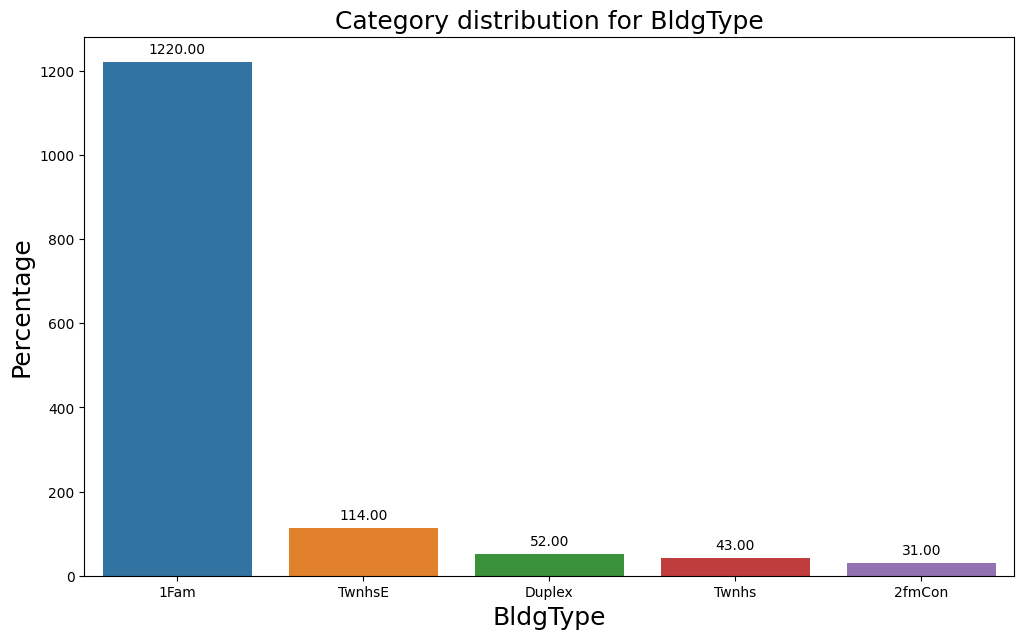

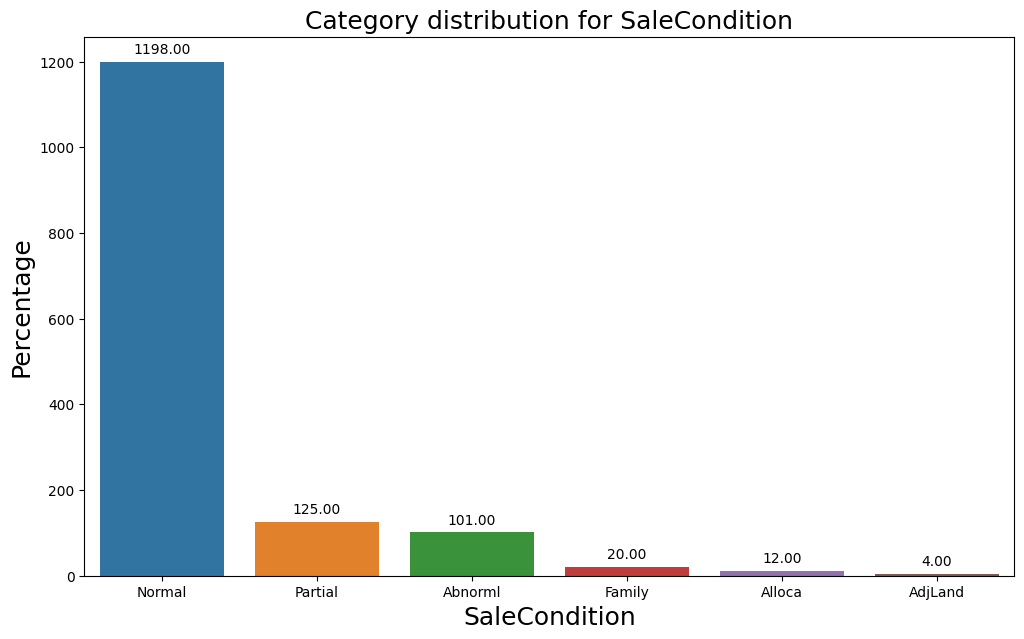

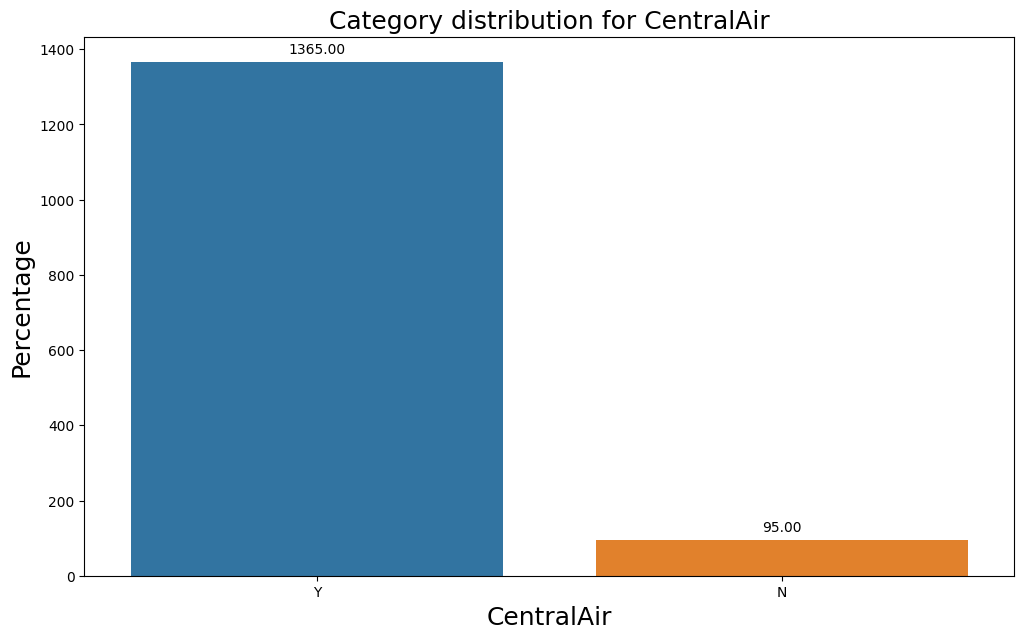

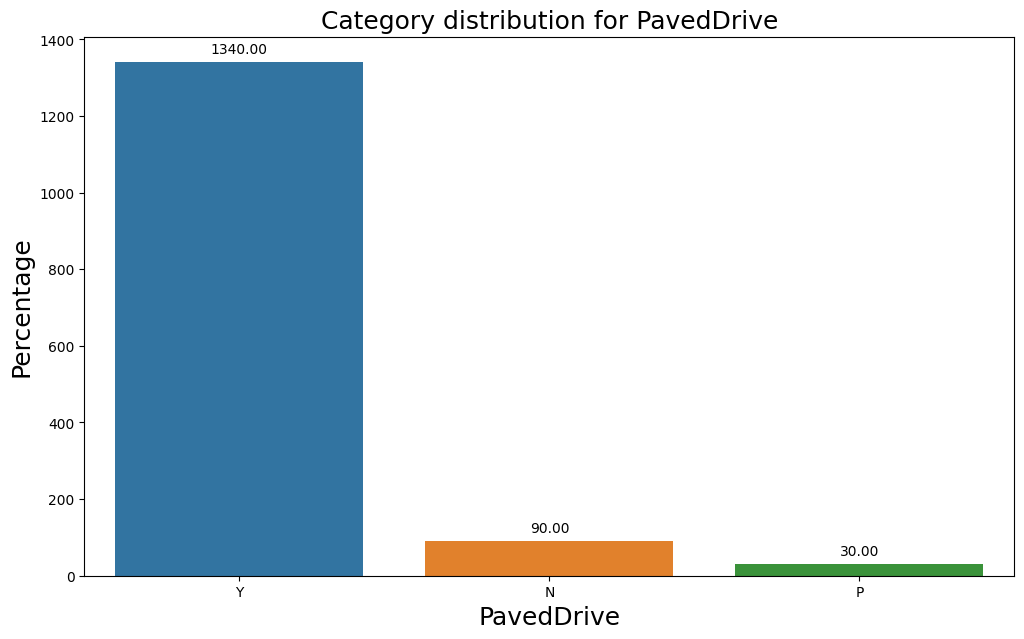

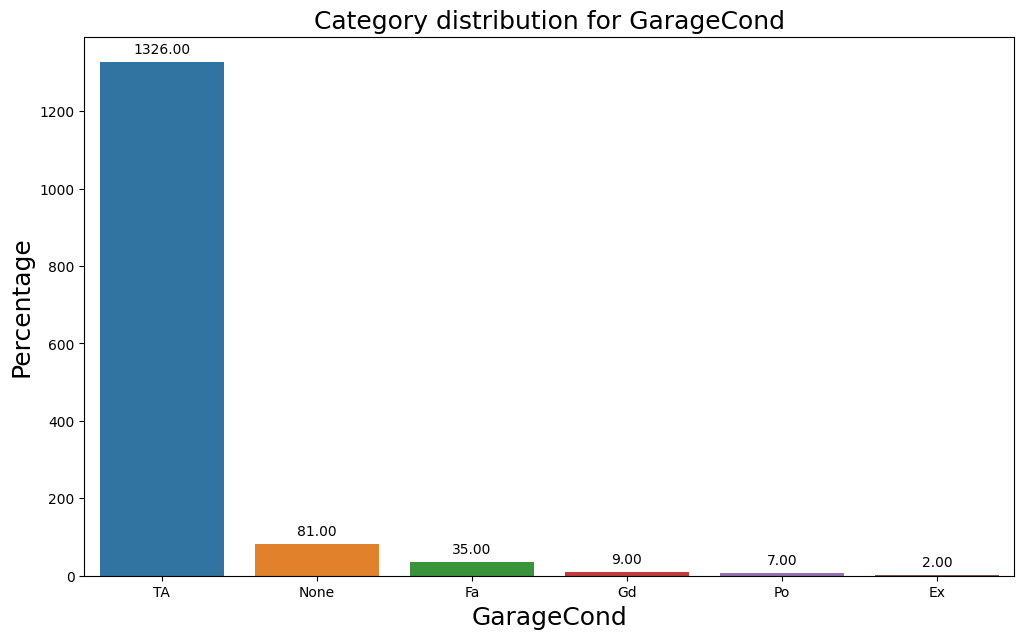

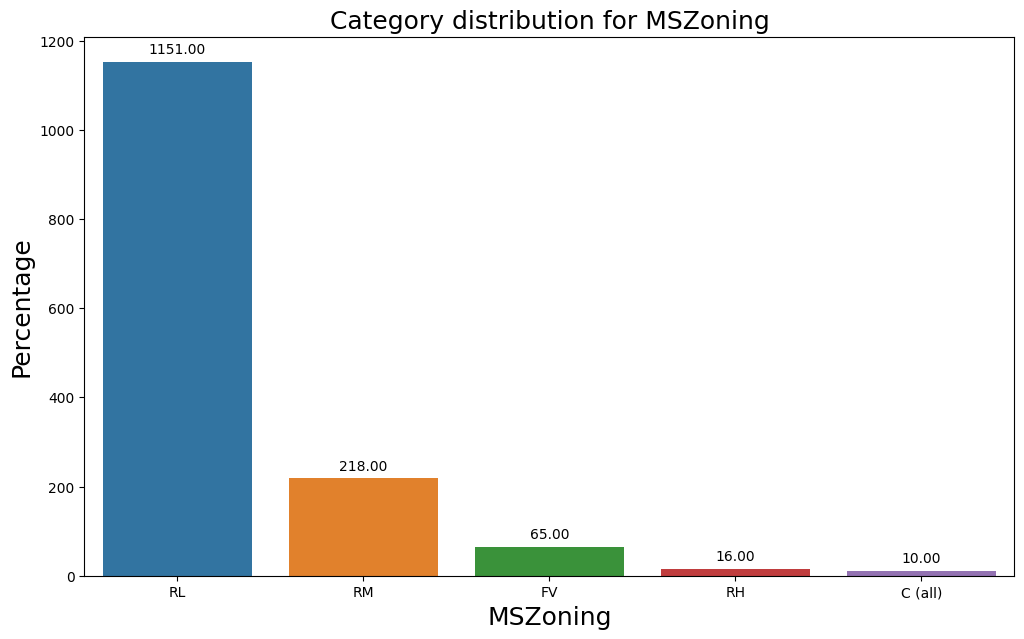

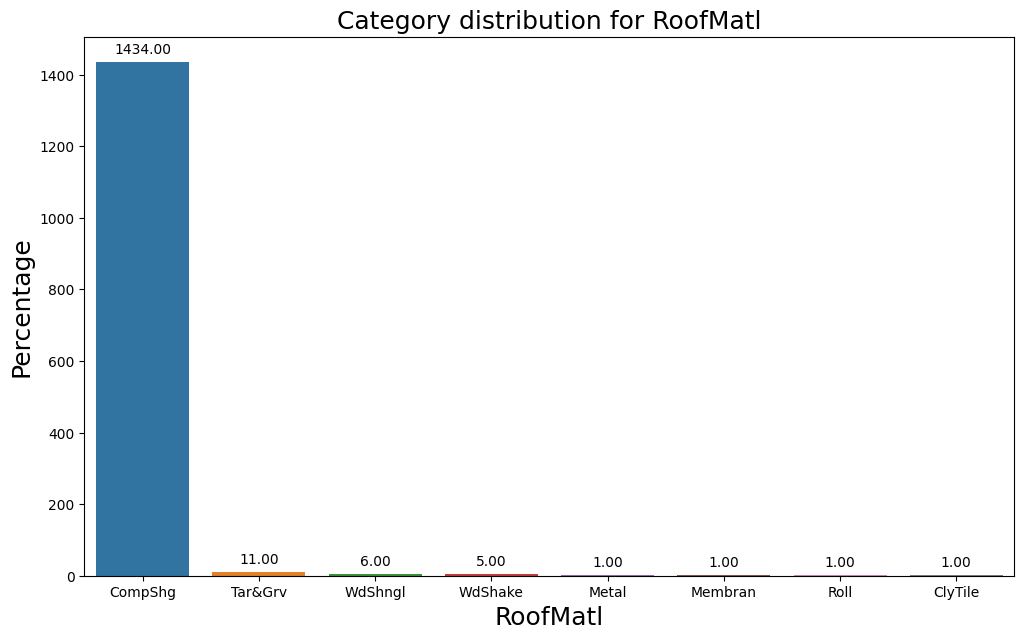

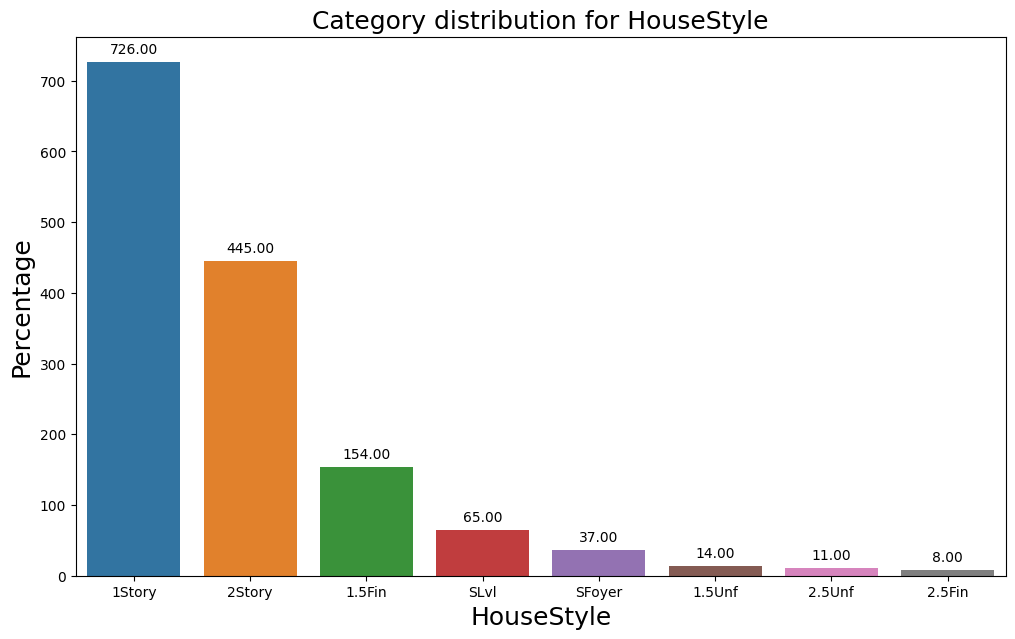

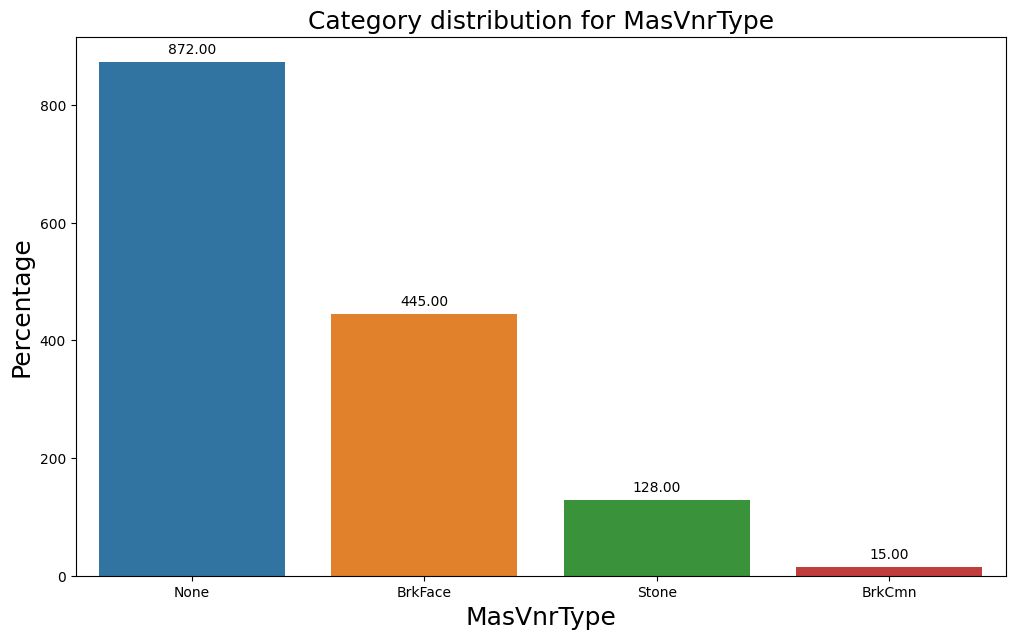

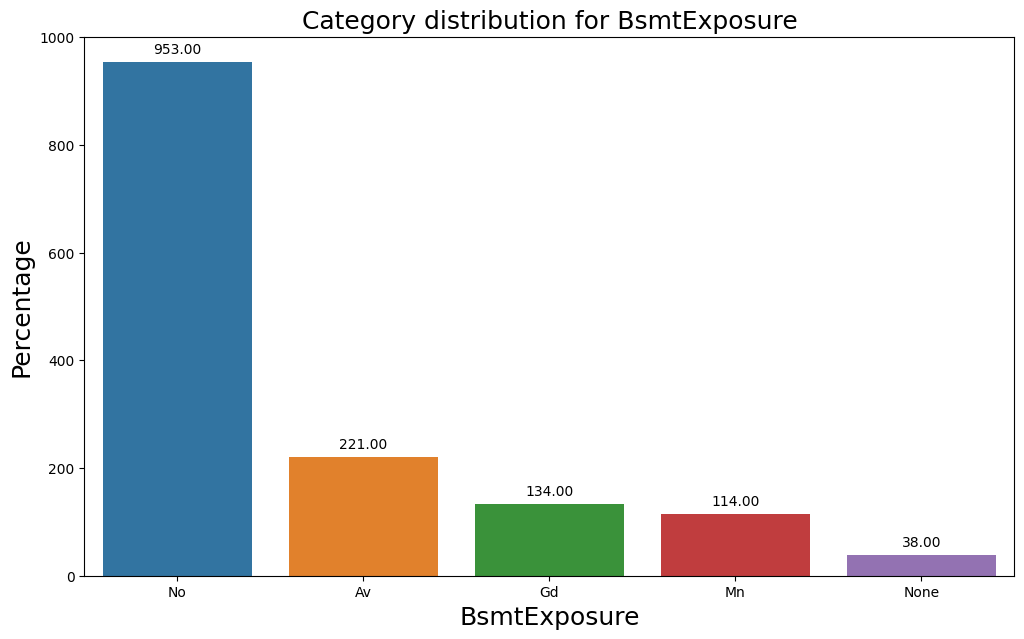

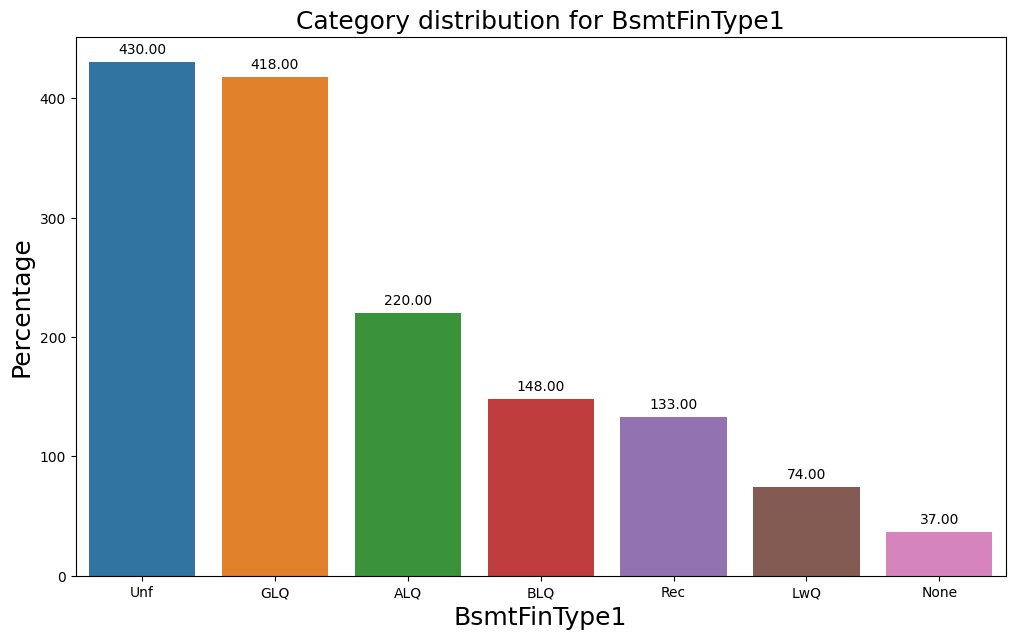

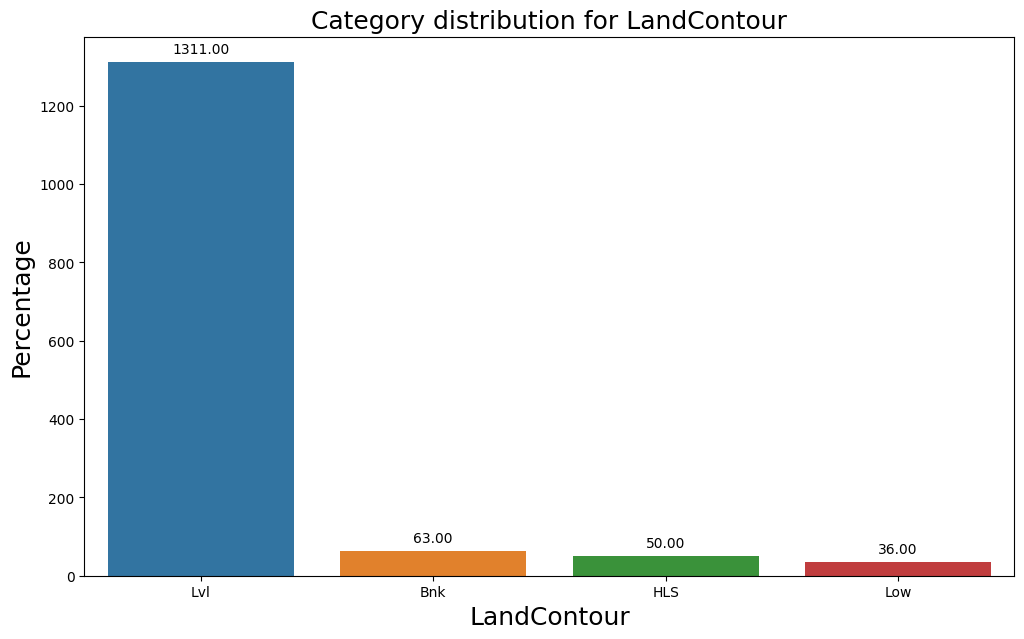

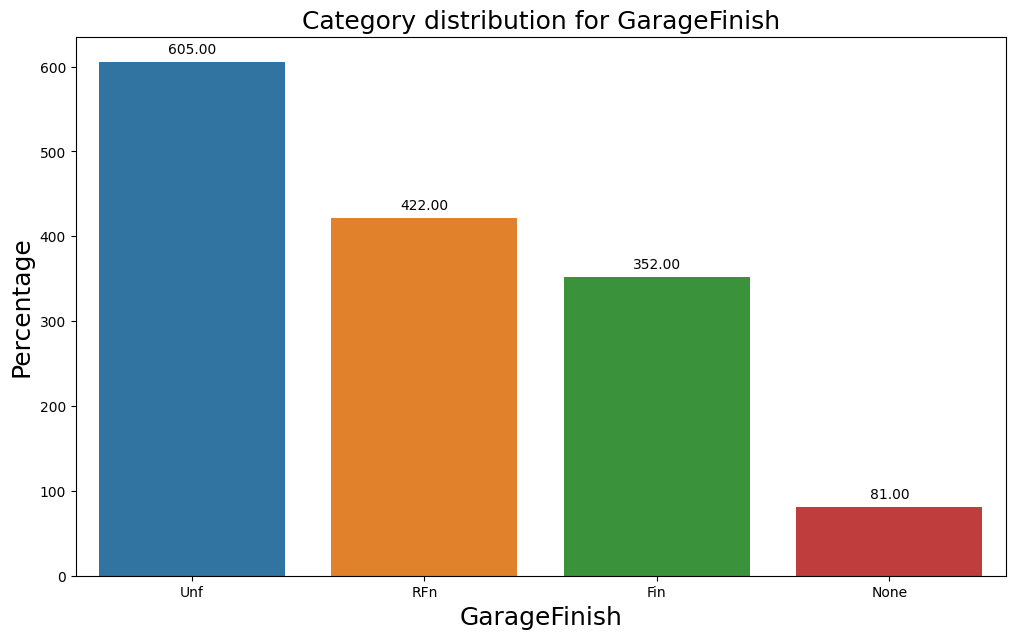

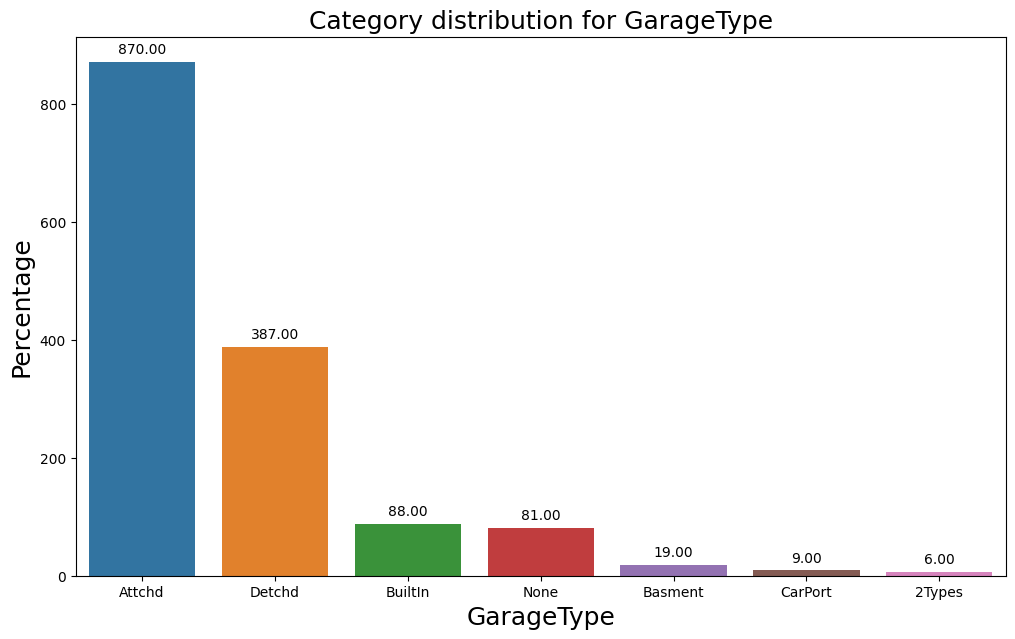

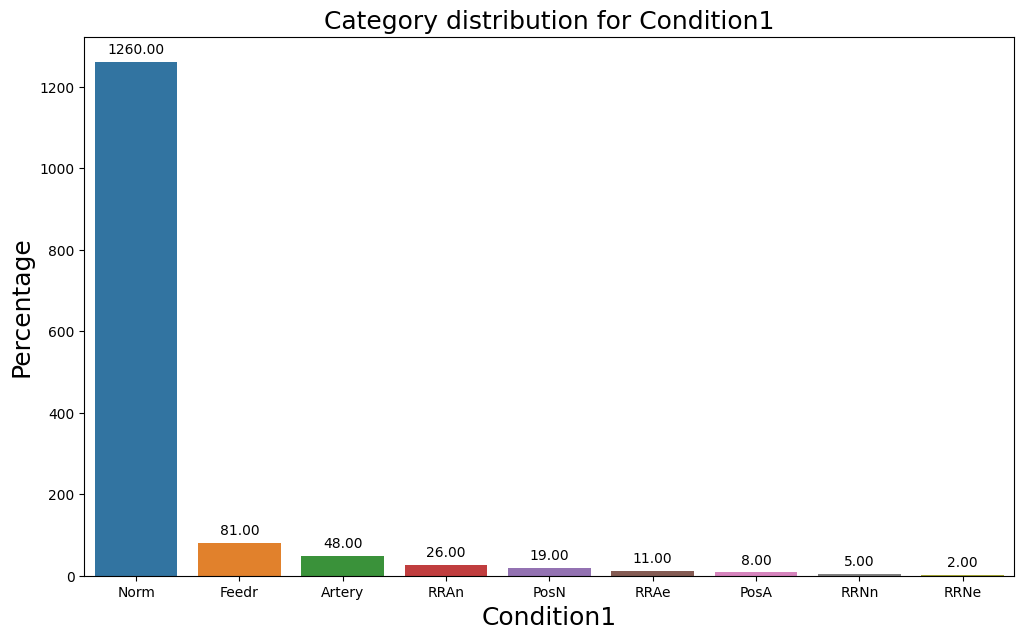

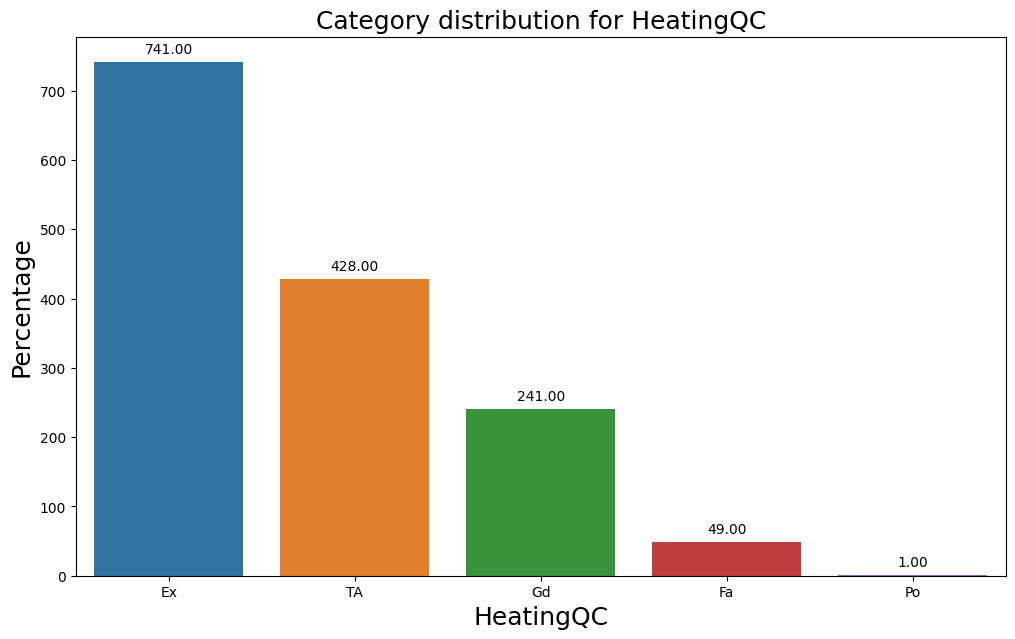

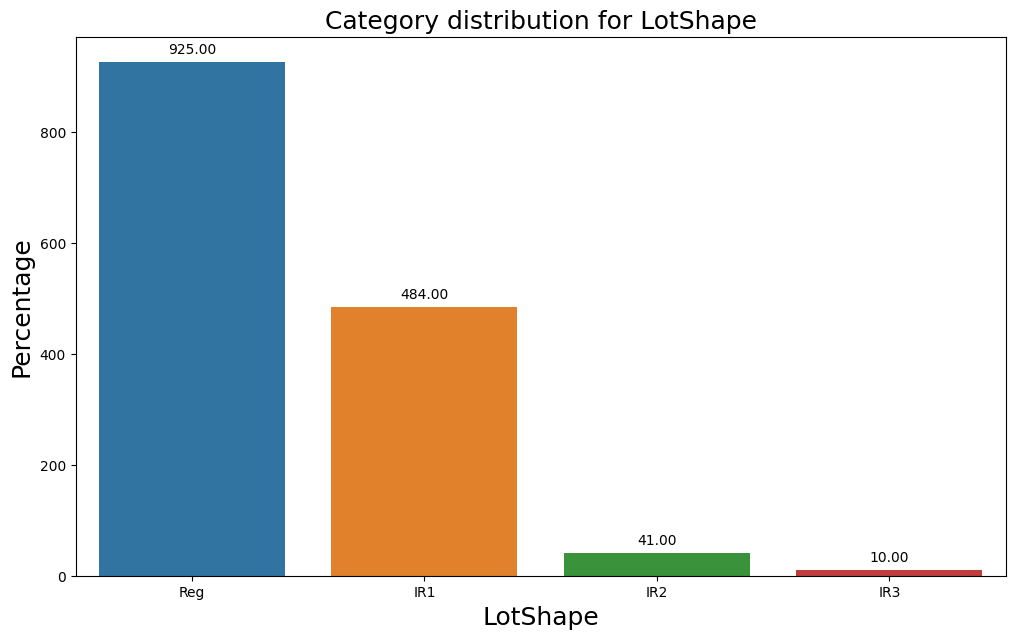

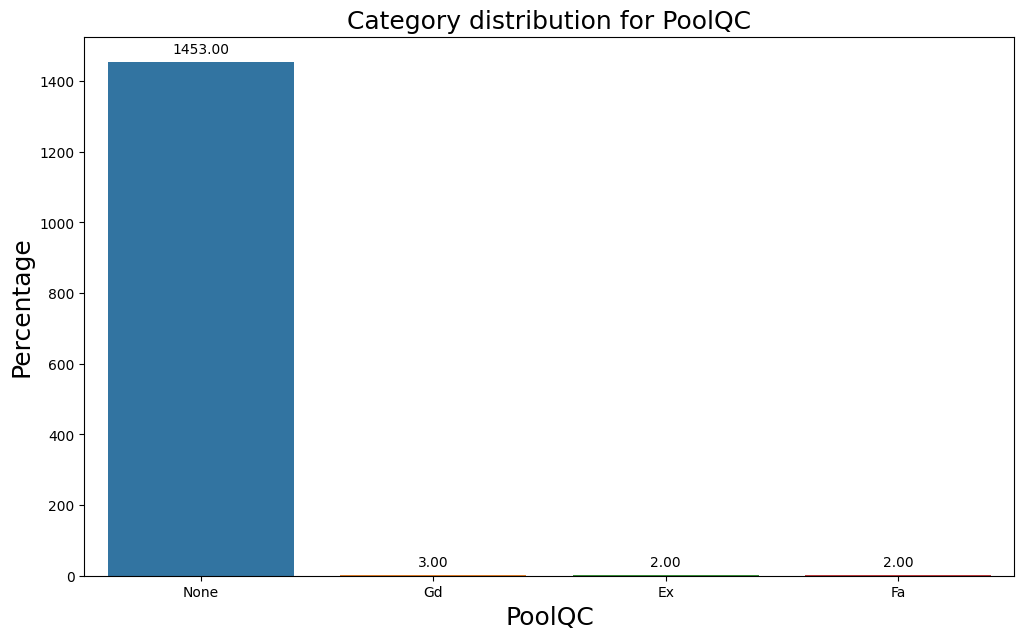

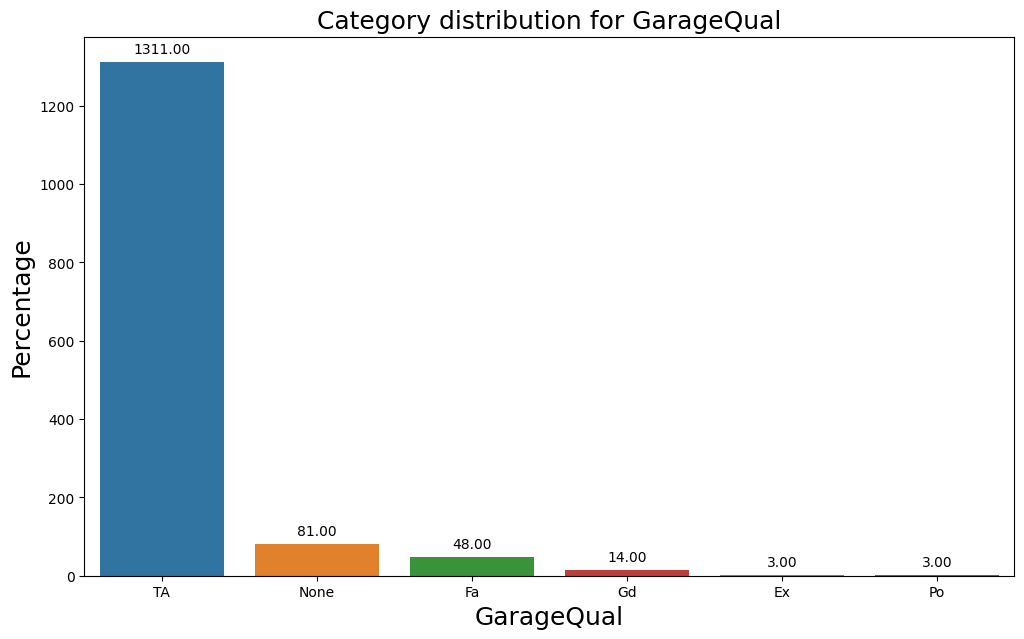

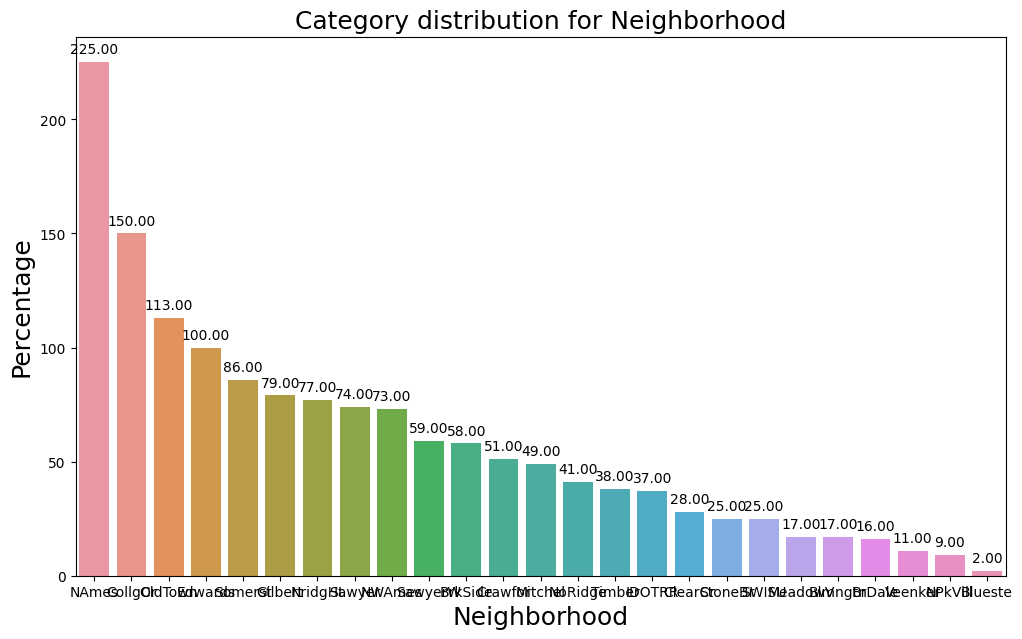

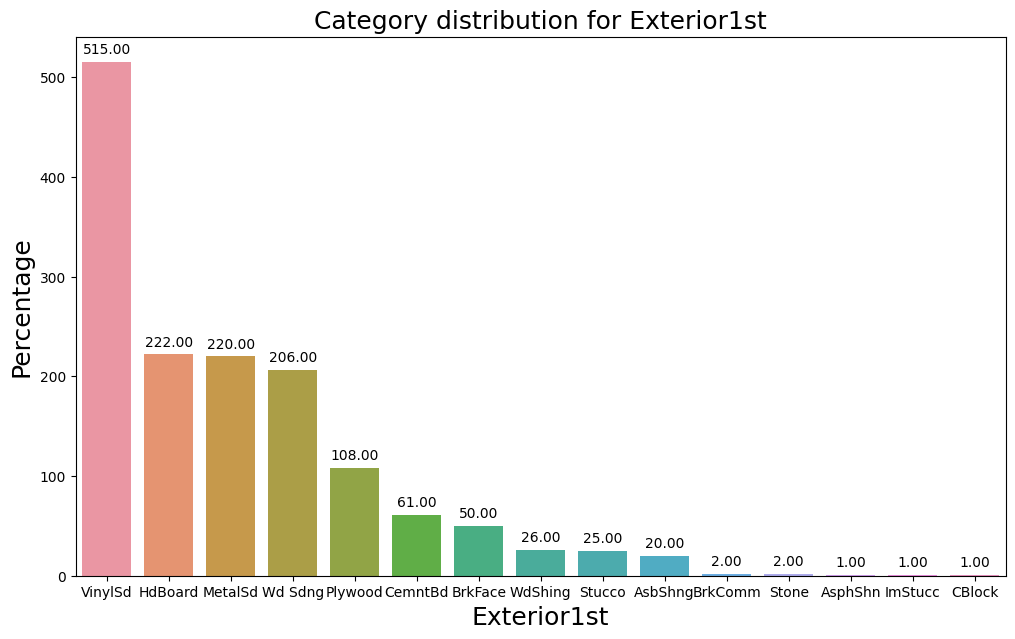

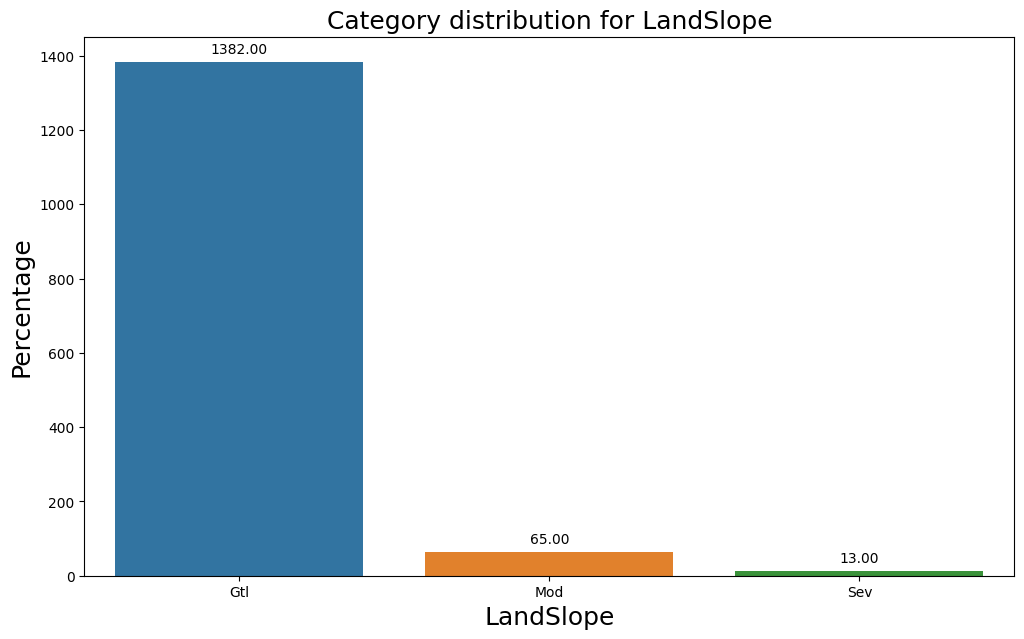

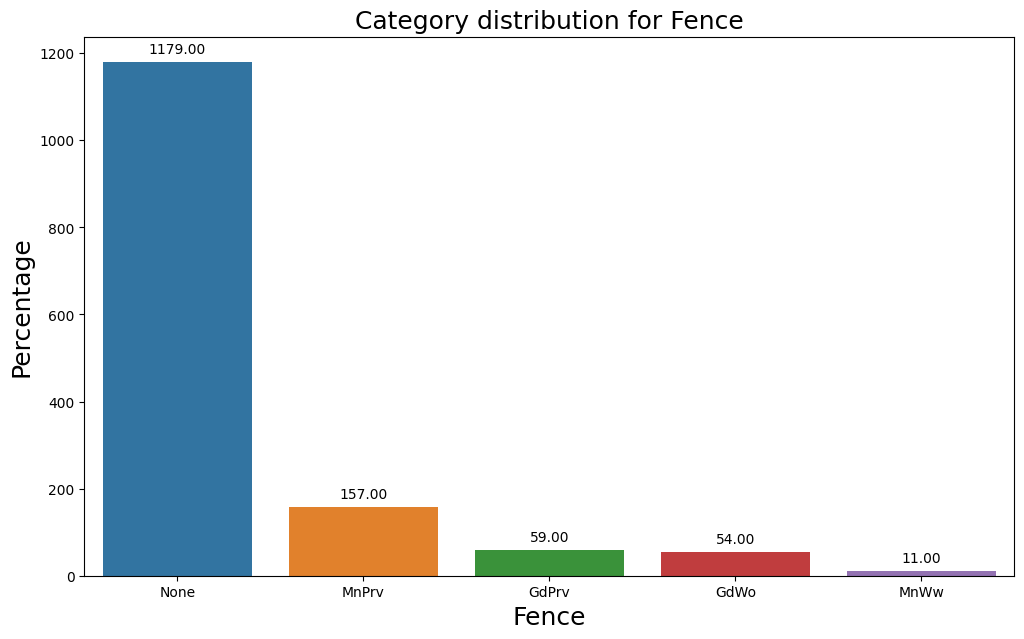

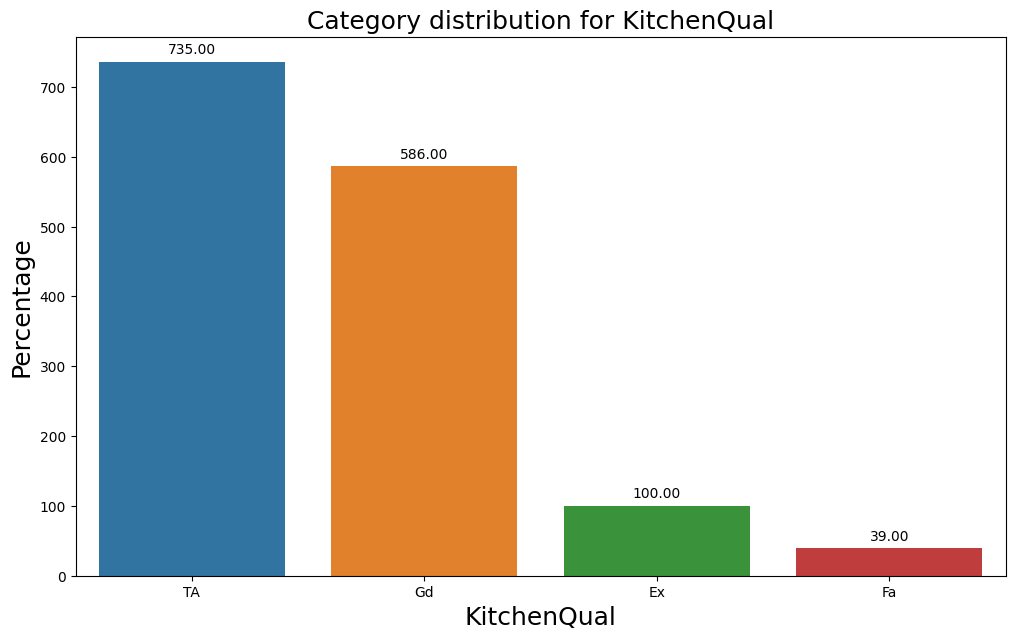

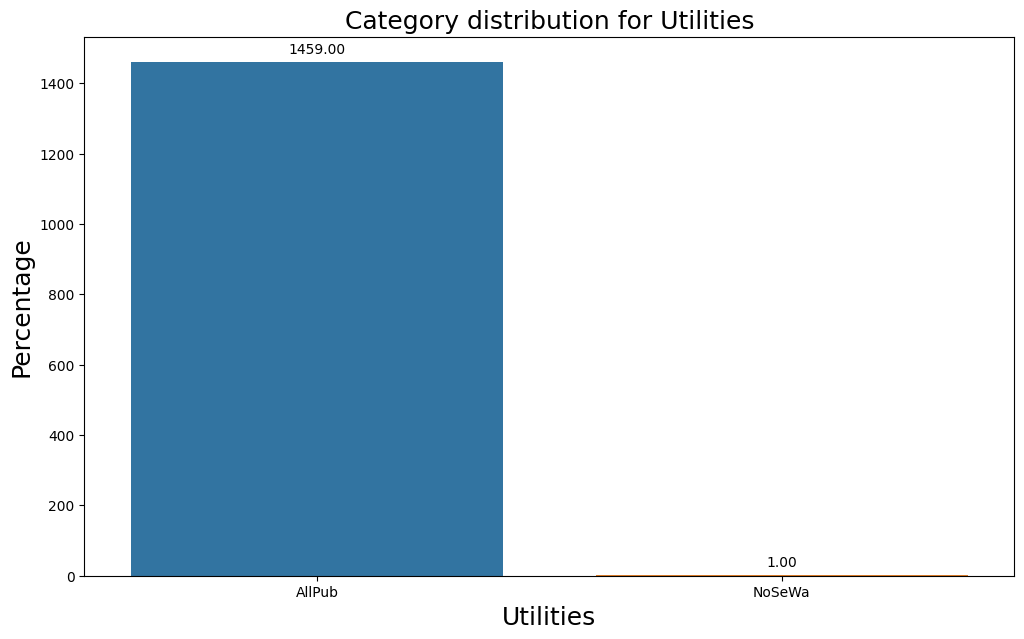

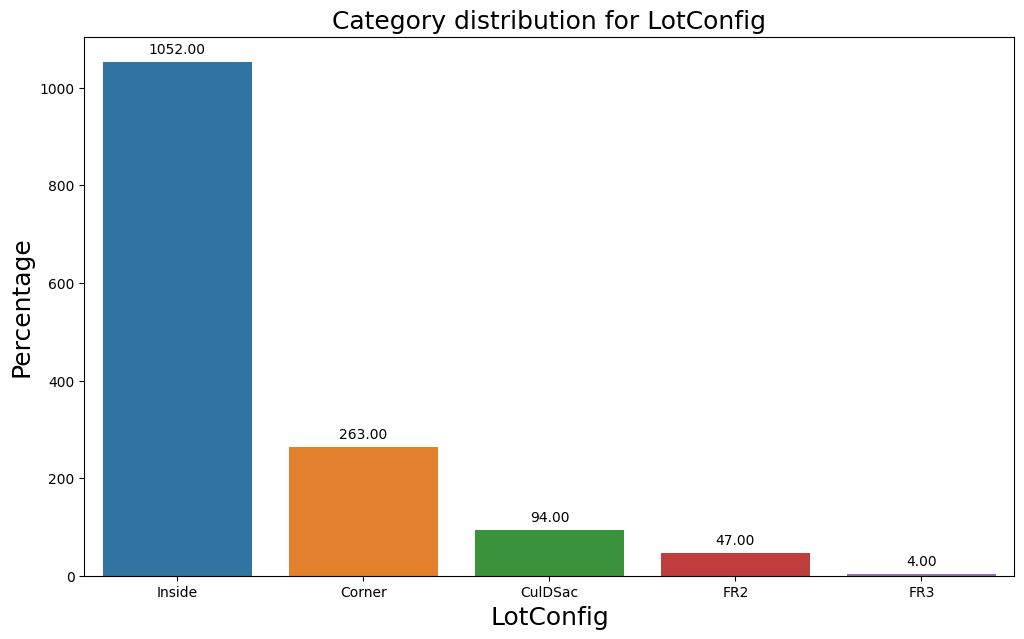

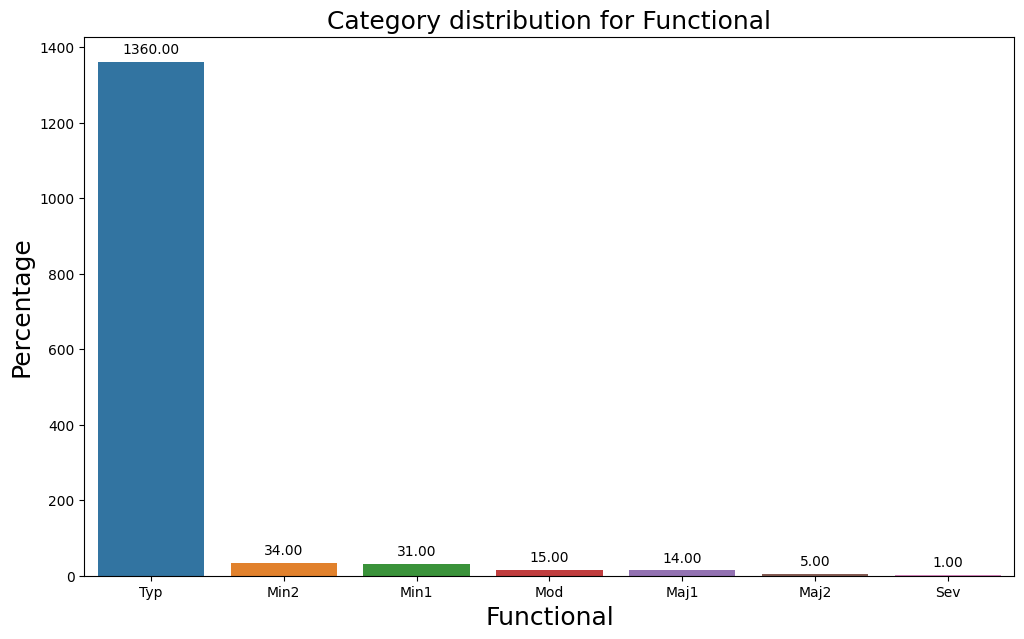

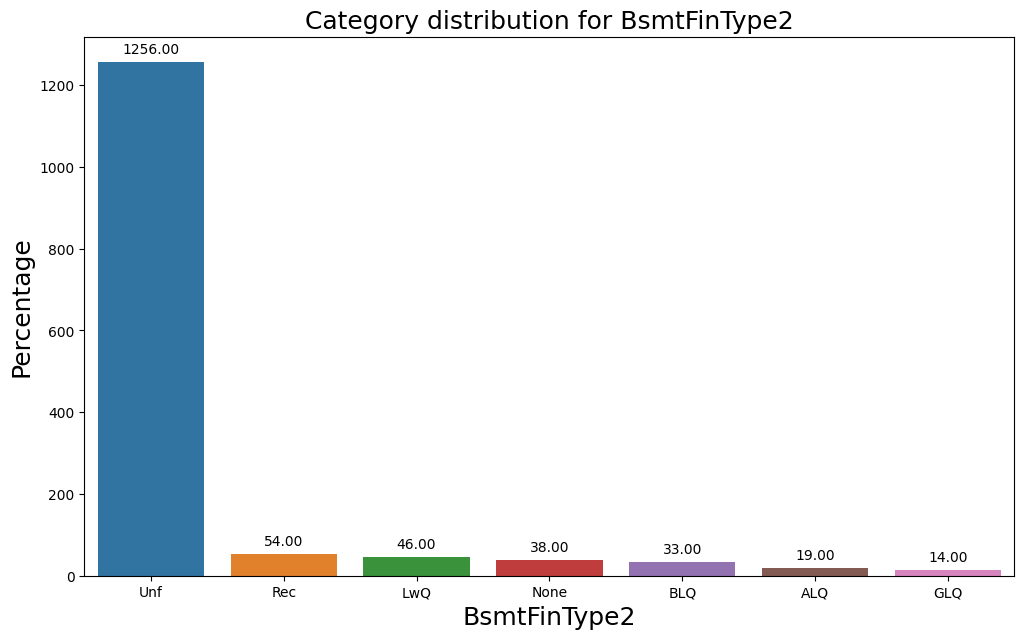

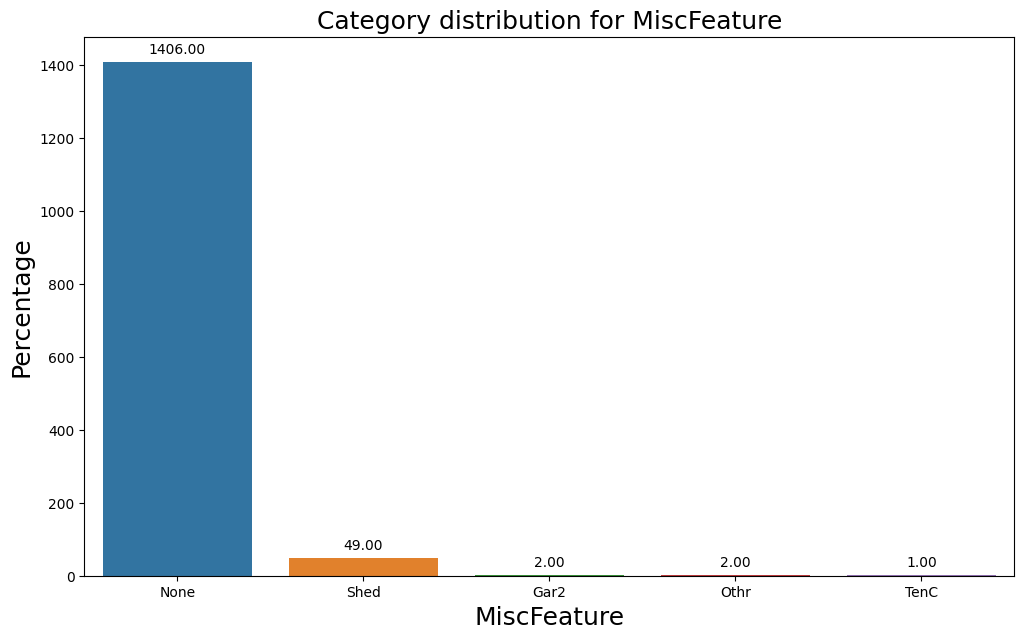

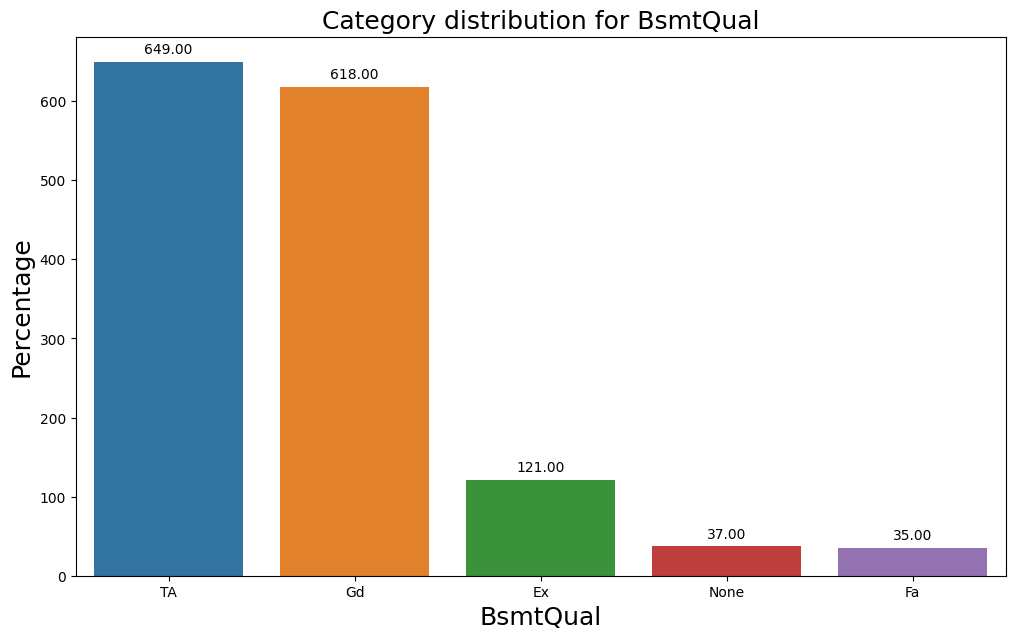

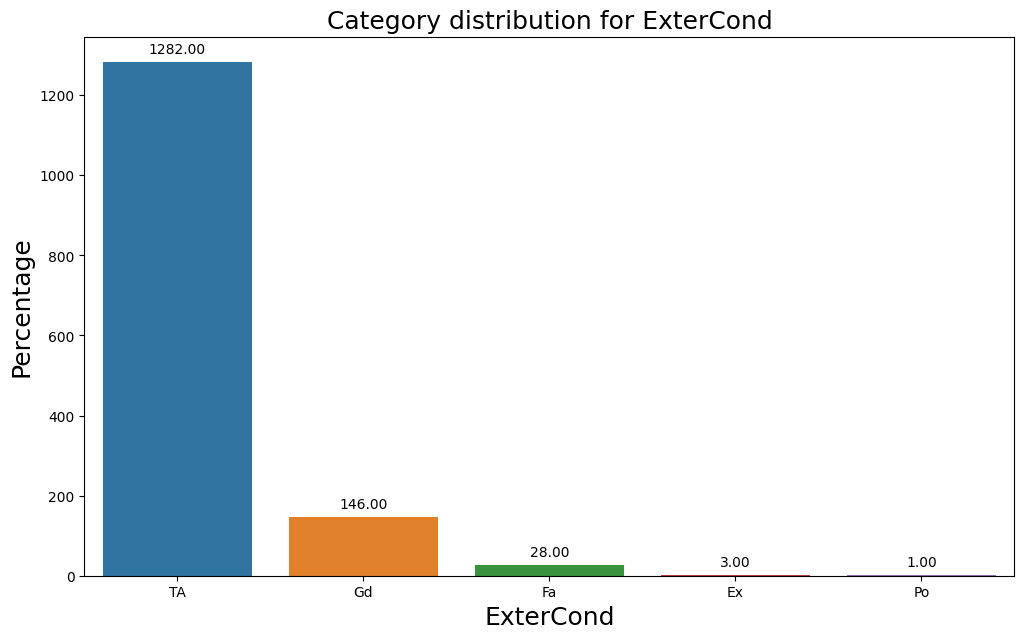

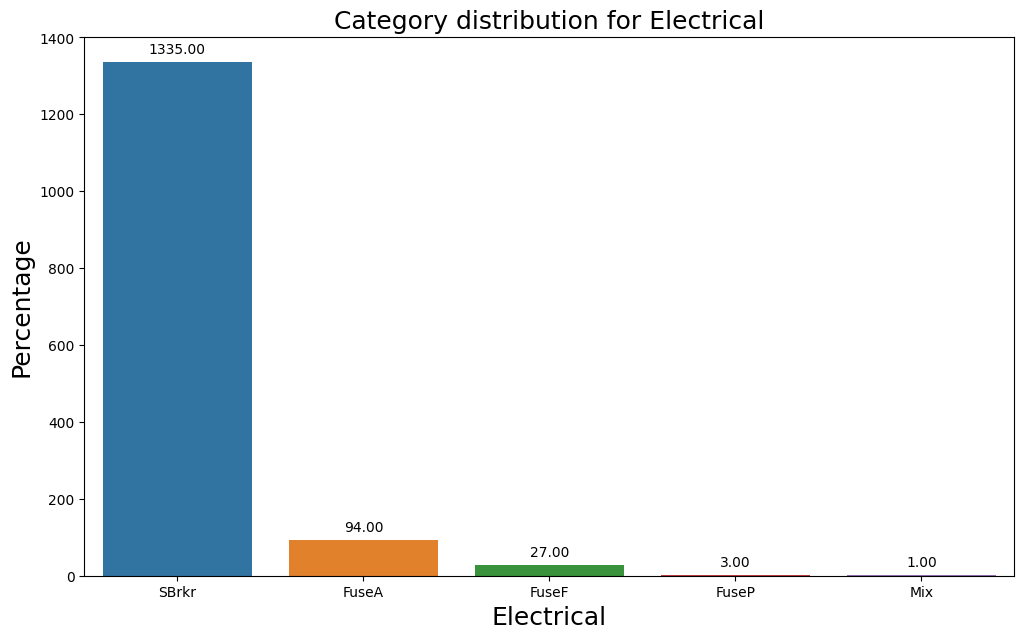

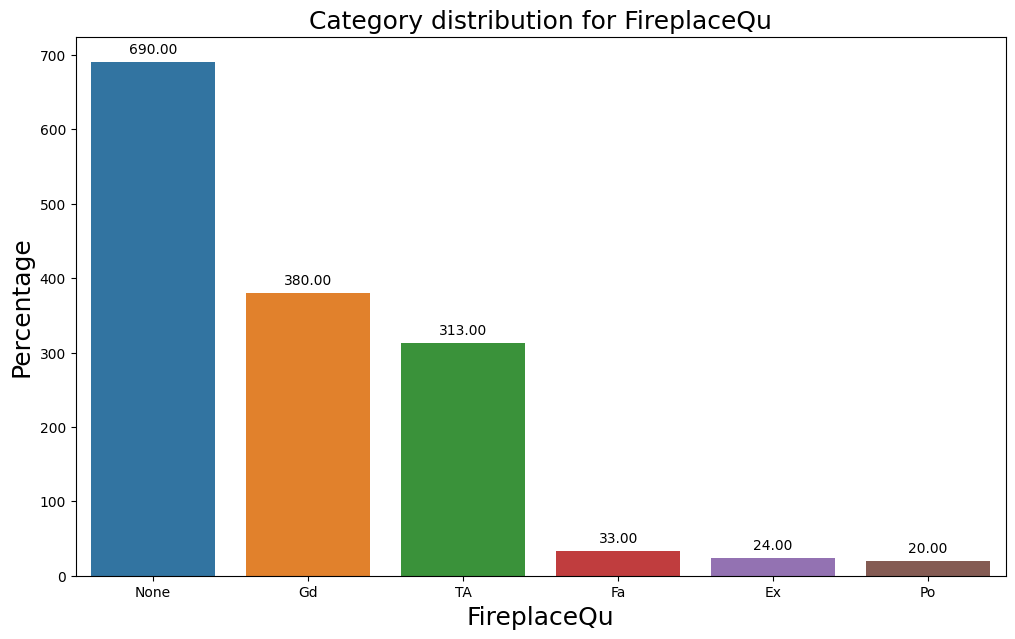

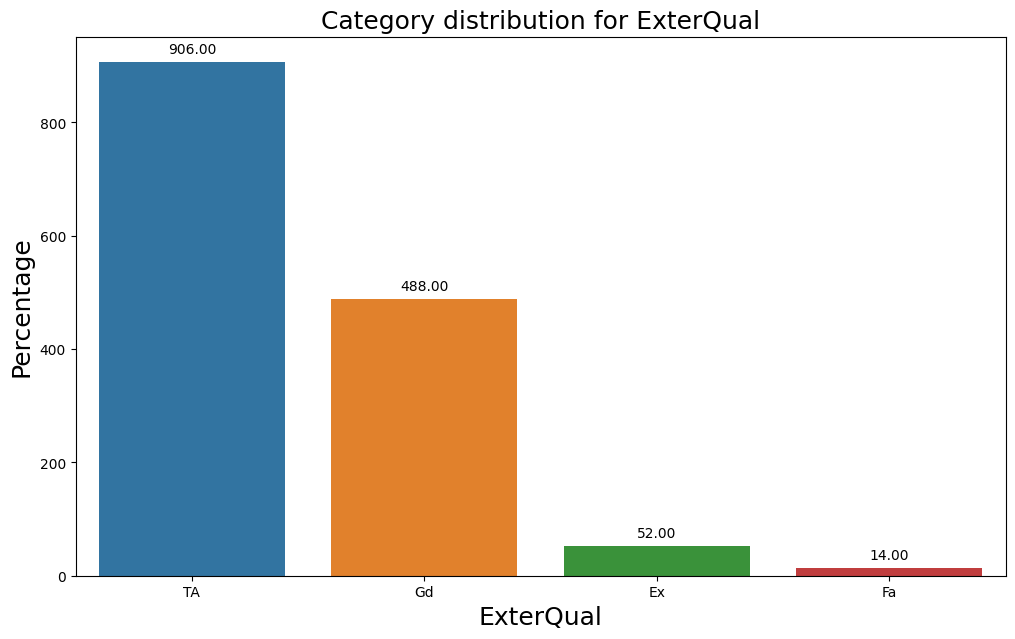

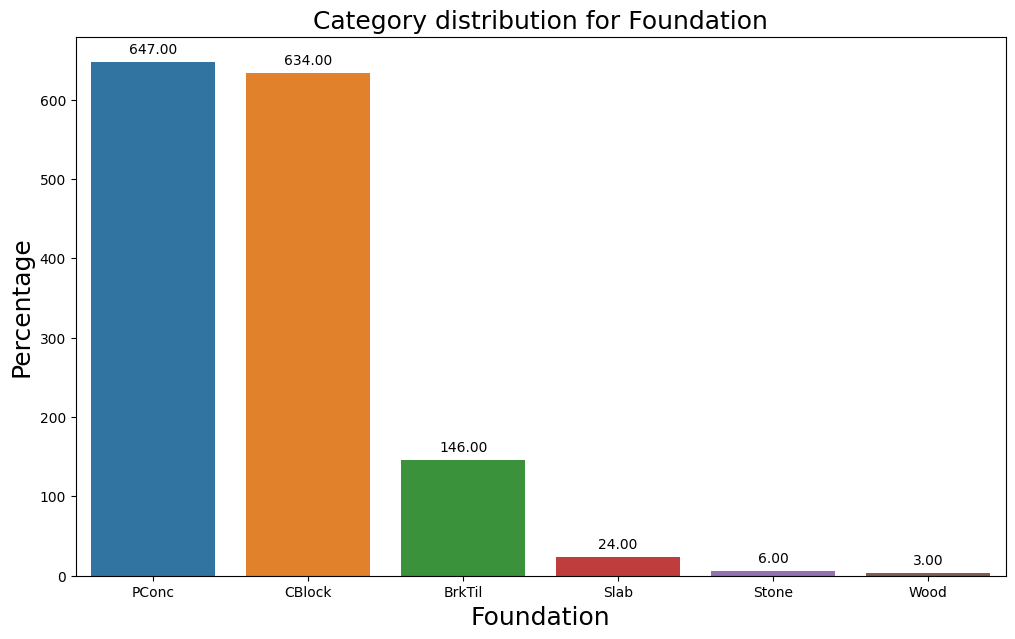

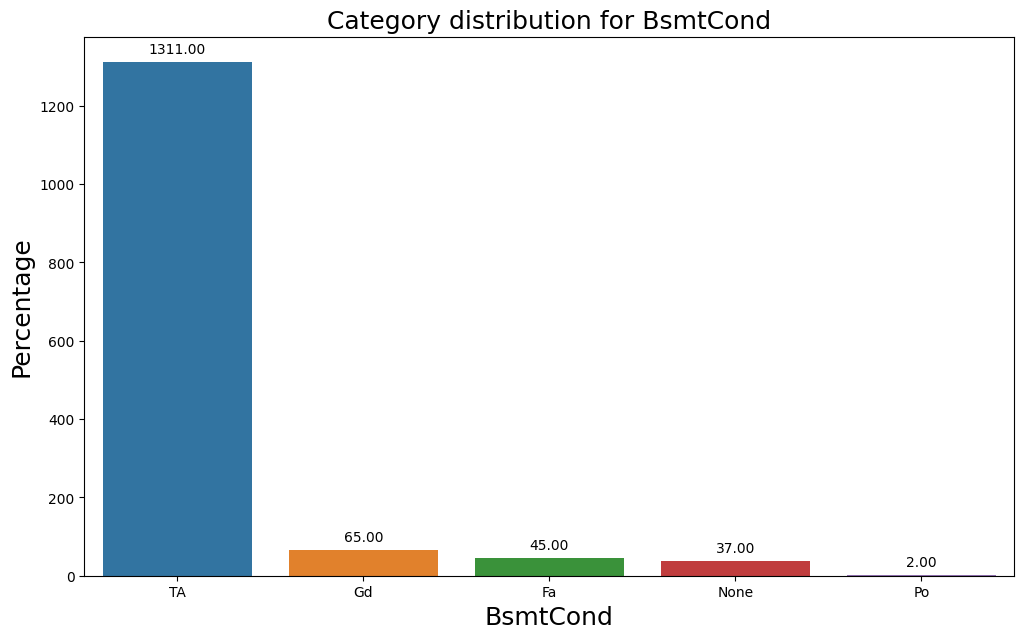

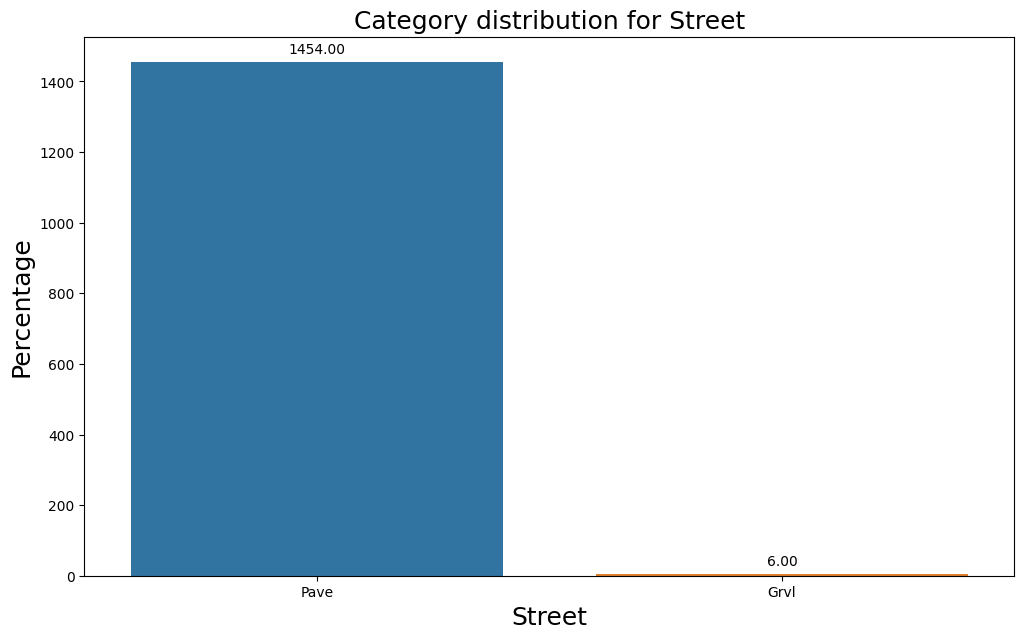

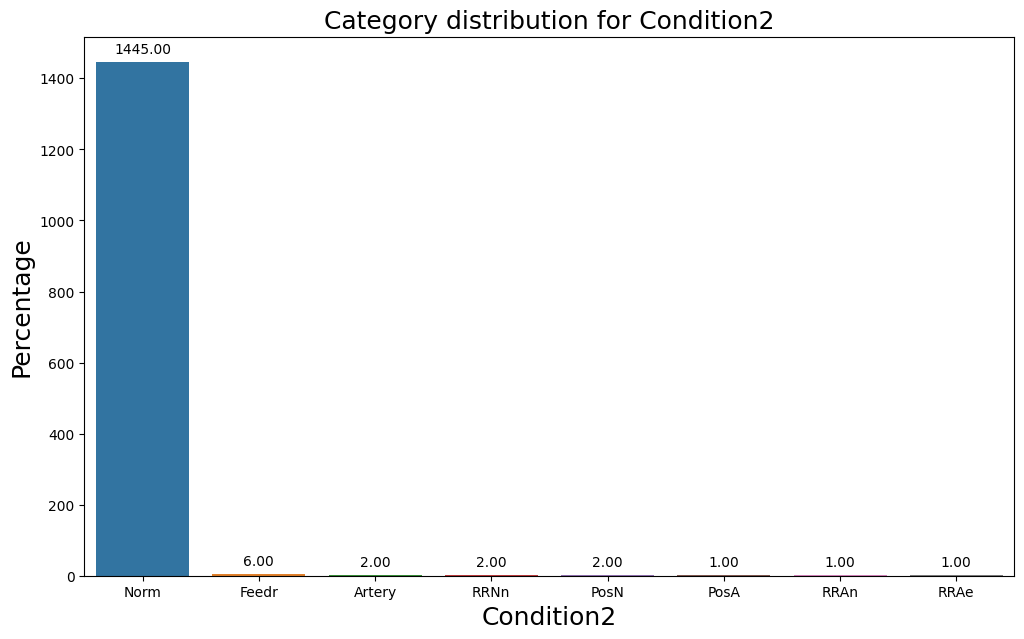

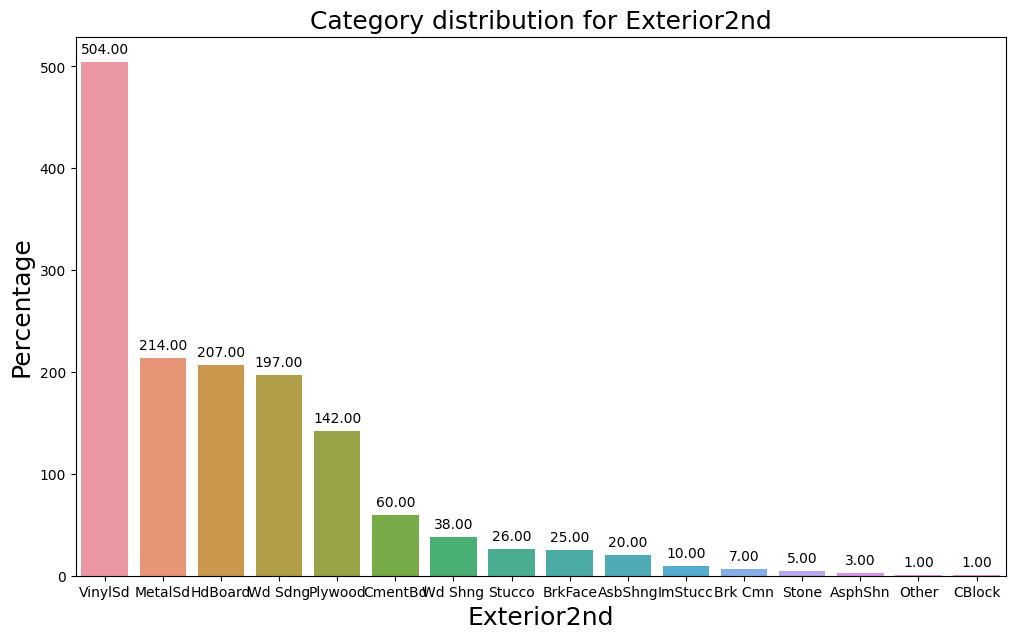

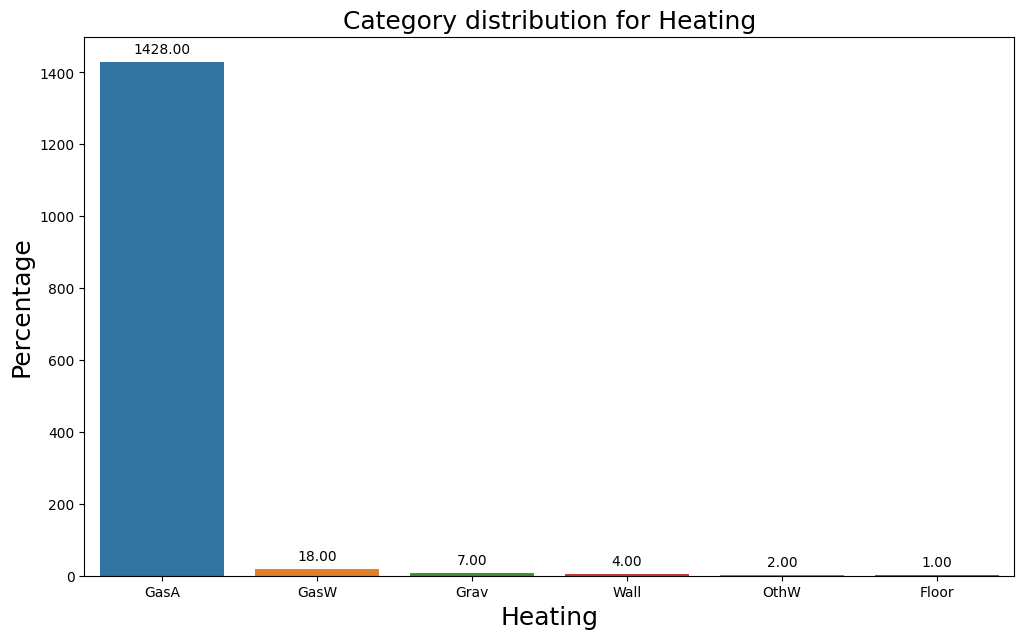

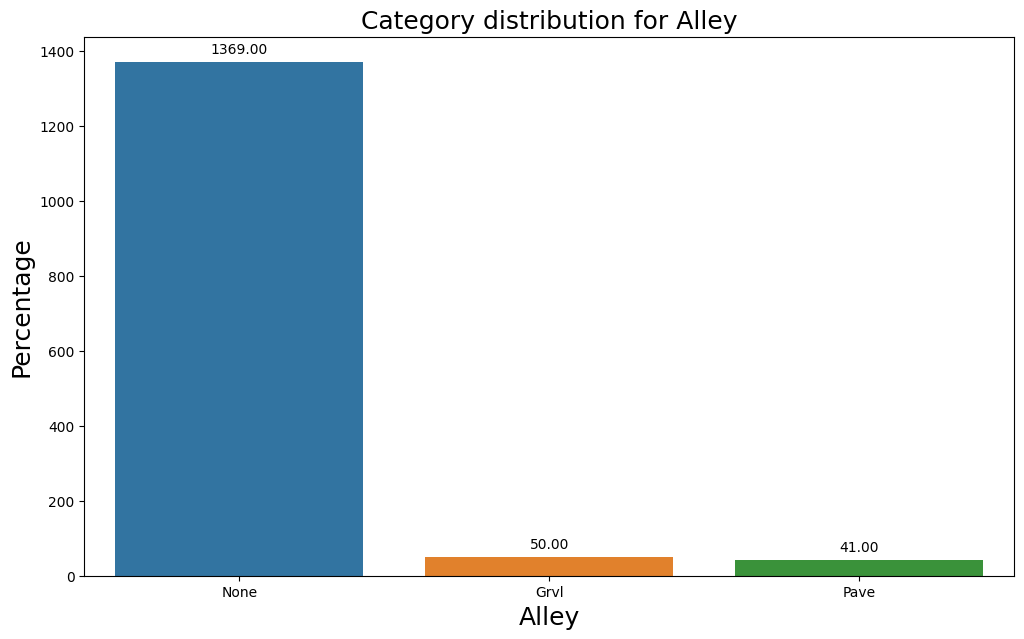

In [29]:
for feature in set(categorical_vars)-set(year_features):
    plot_categorical_feature(data, feature)

We will drop the following columns because of skewed categories:

1. MiscFeature
2. PoolQC
3. Heating
4. Condition2
5. RoofMatl
6. Street
7. Utilities

In [30]:
categorical_vars = list(set(categorical_vars) - set(['MiscFeature','PoolQC','Heating','Condition2','RoofMatl','Street','Utilities']))

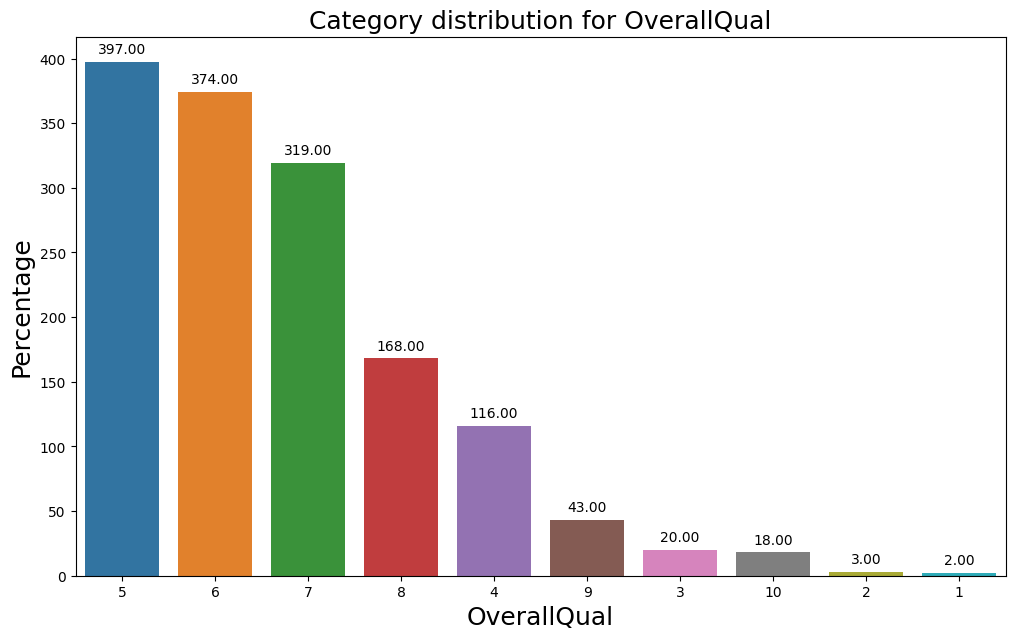

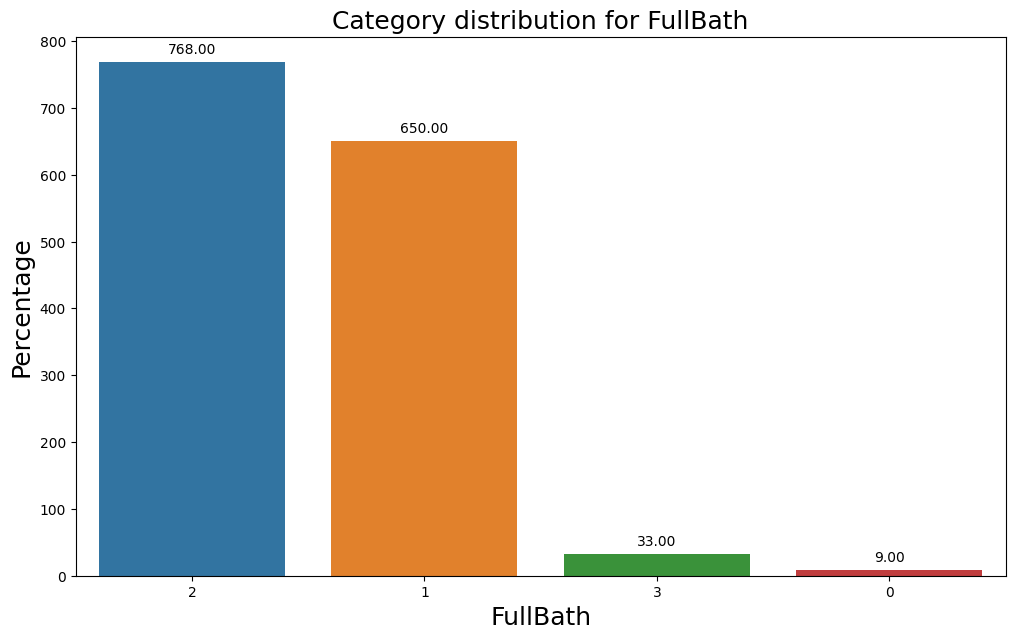

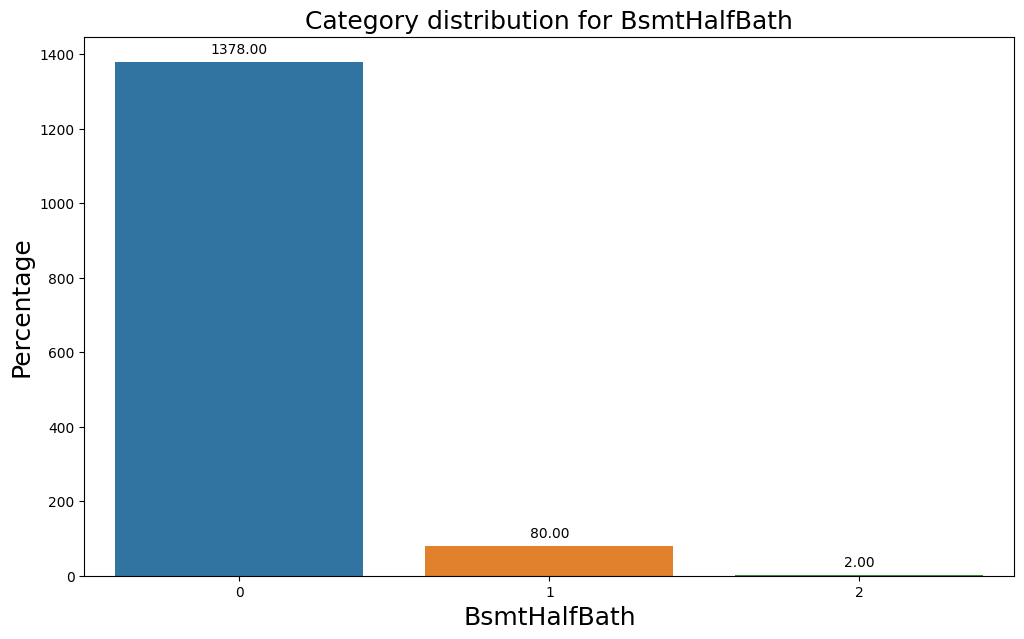

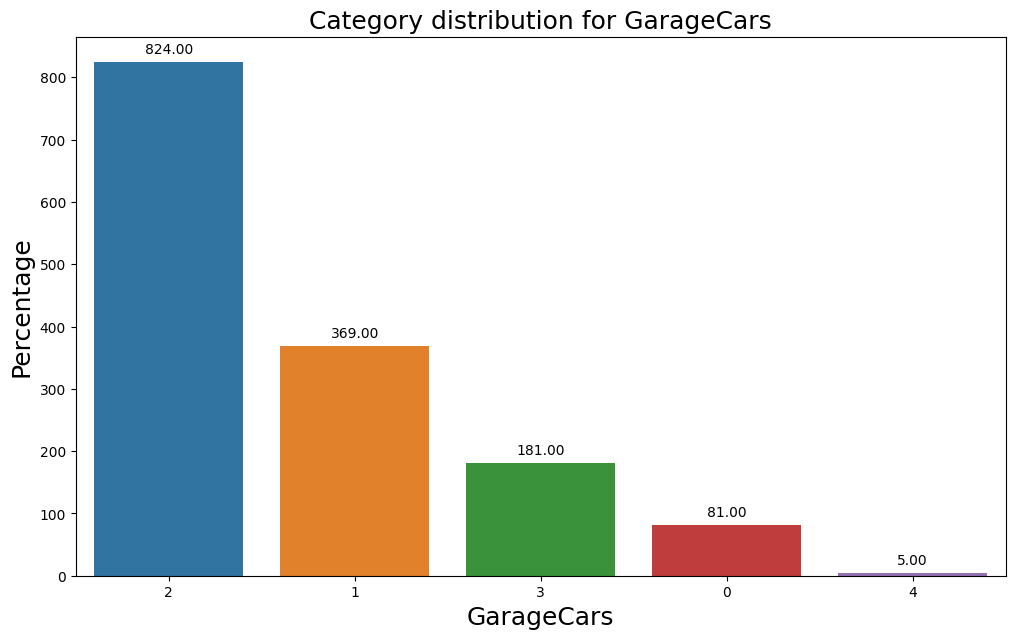

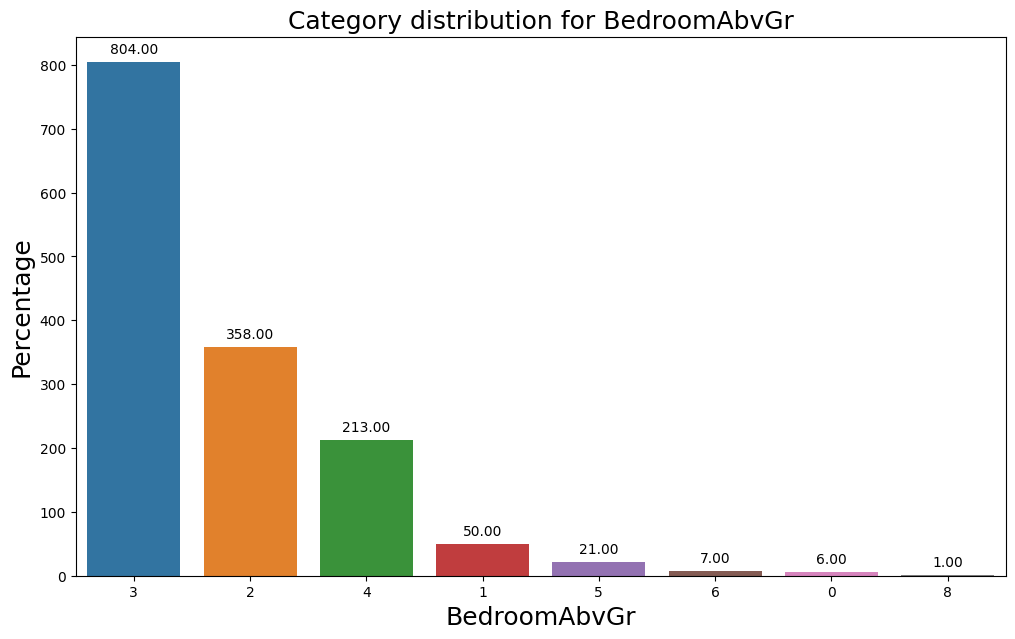

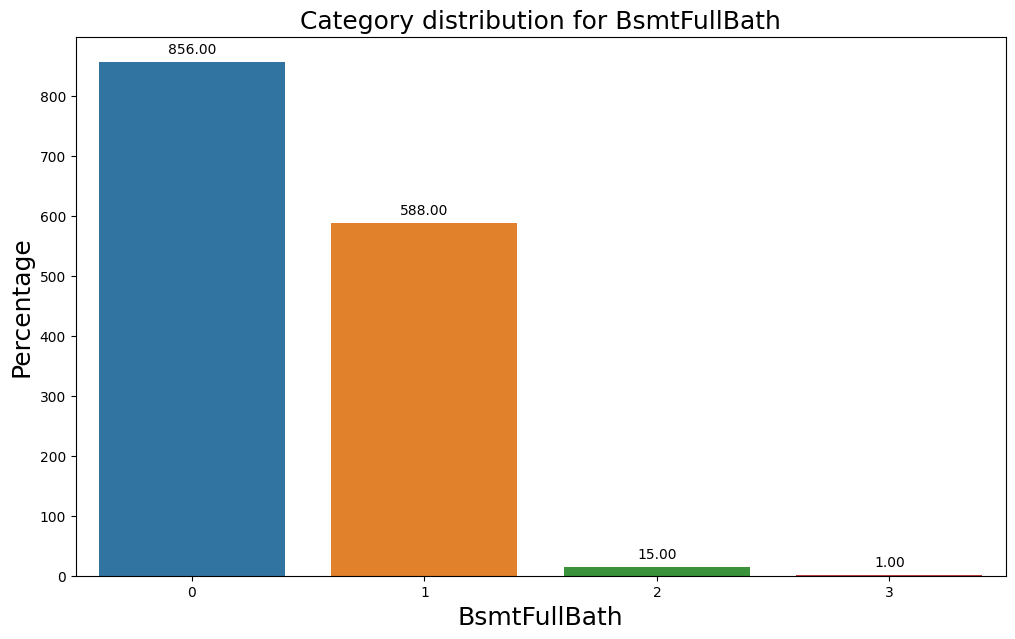

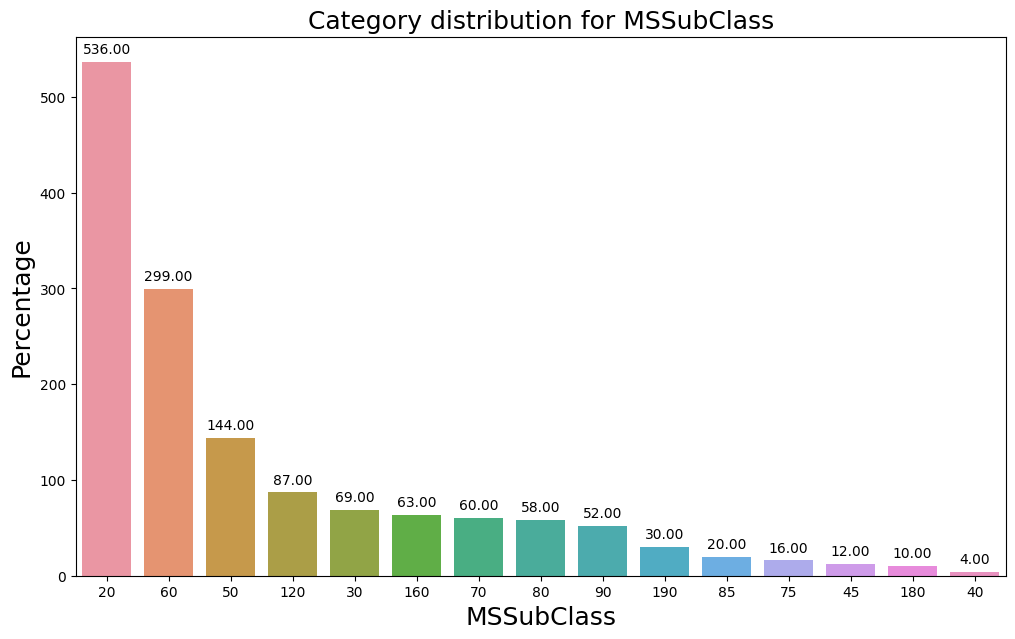

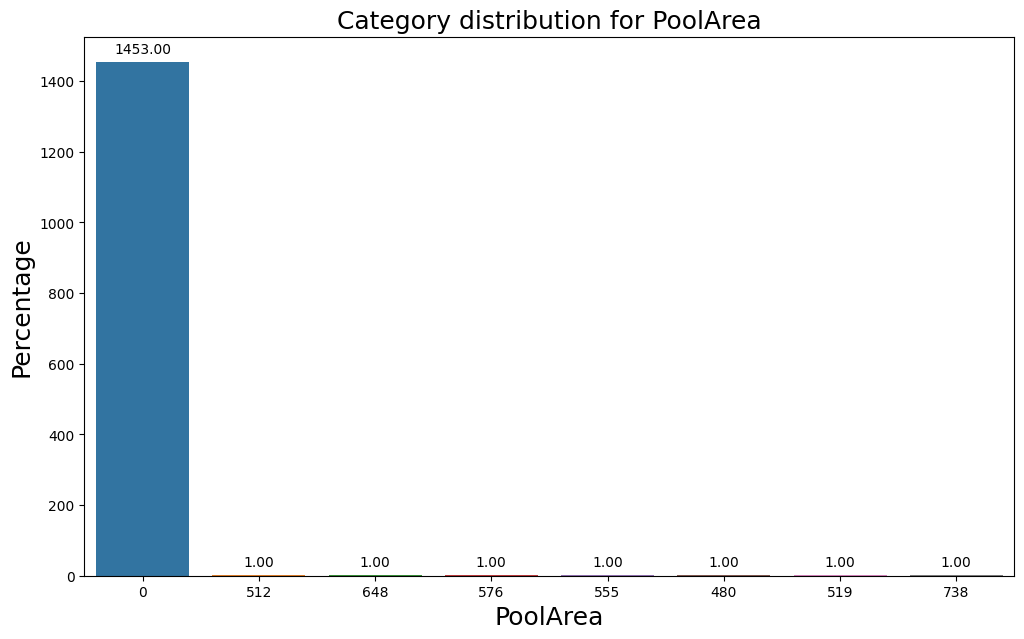

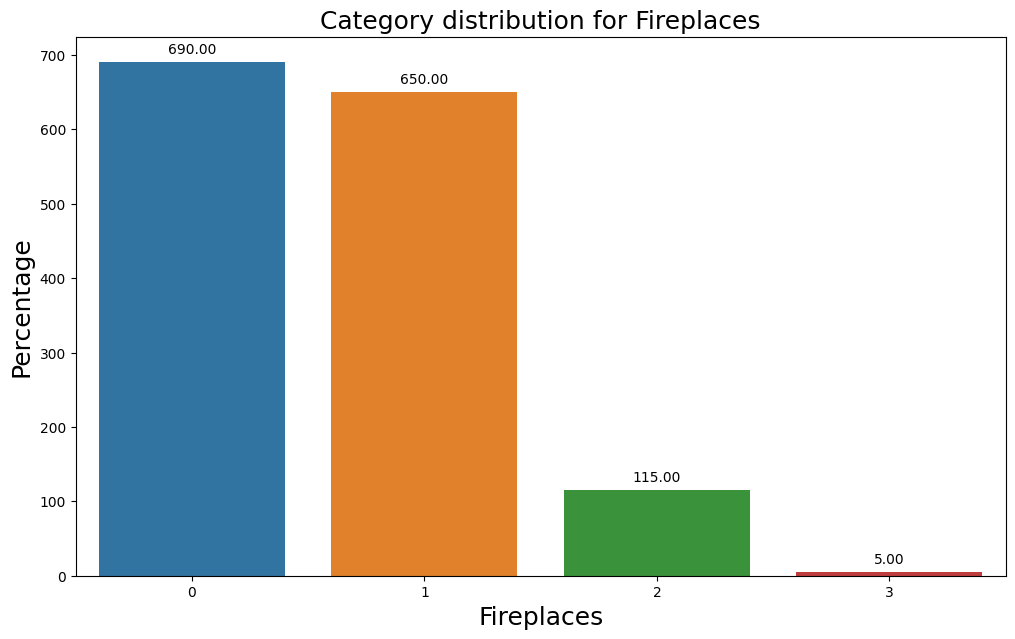

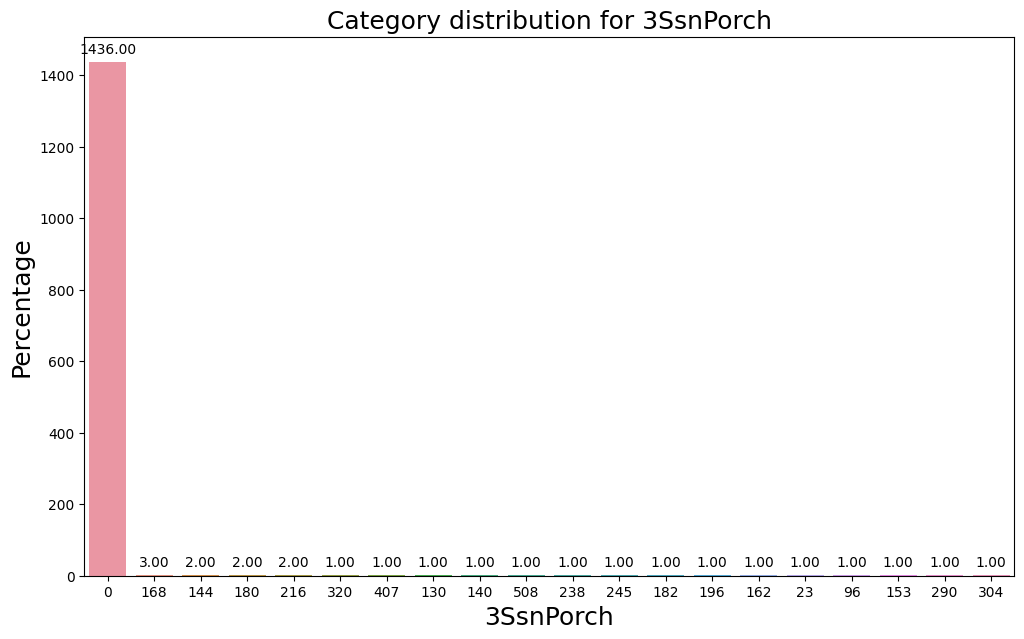

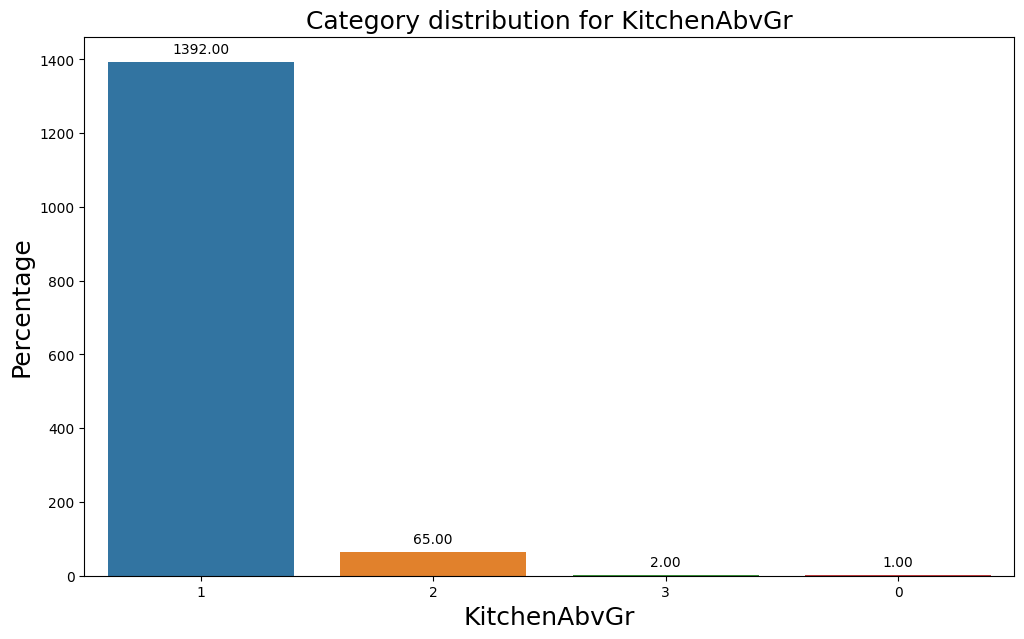

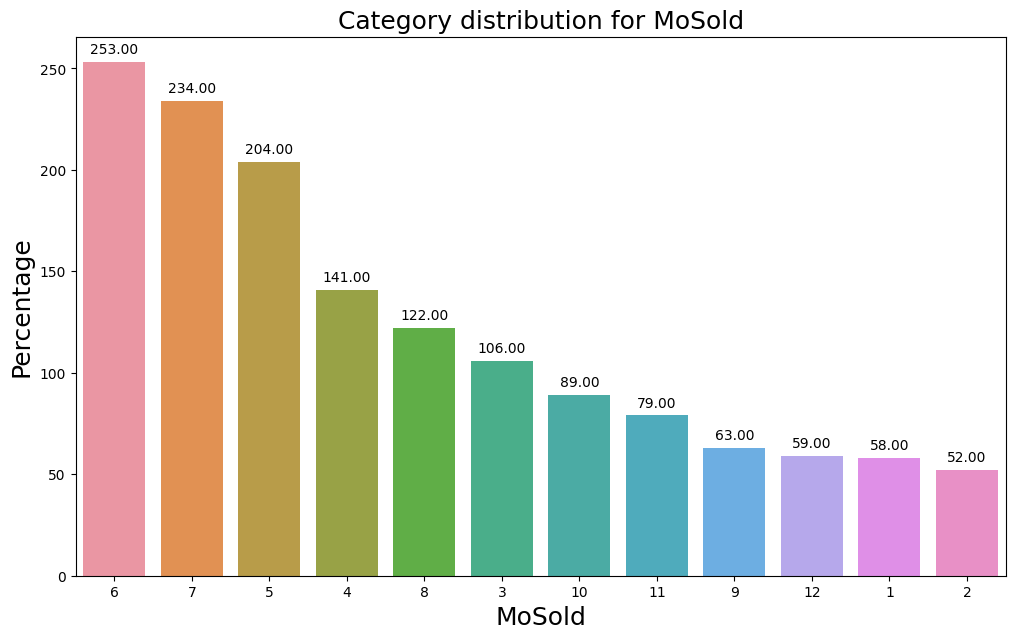

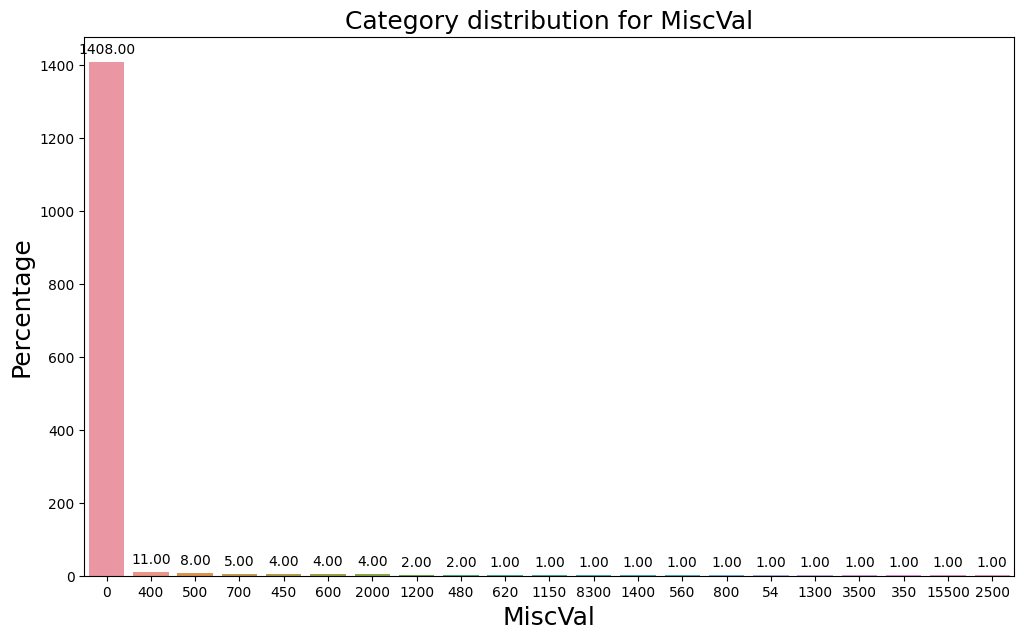

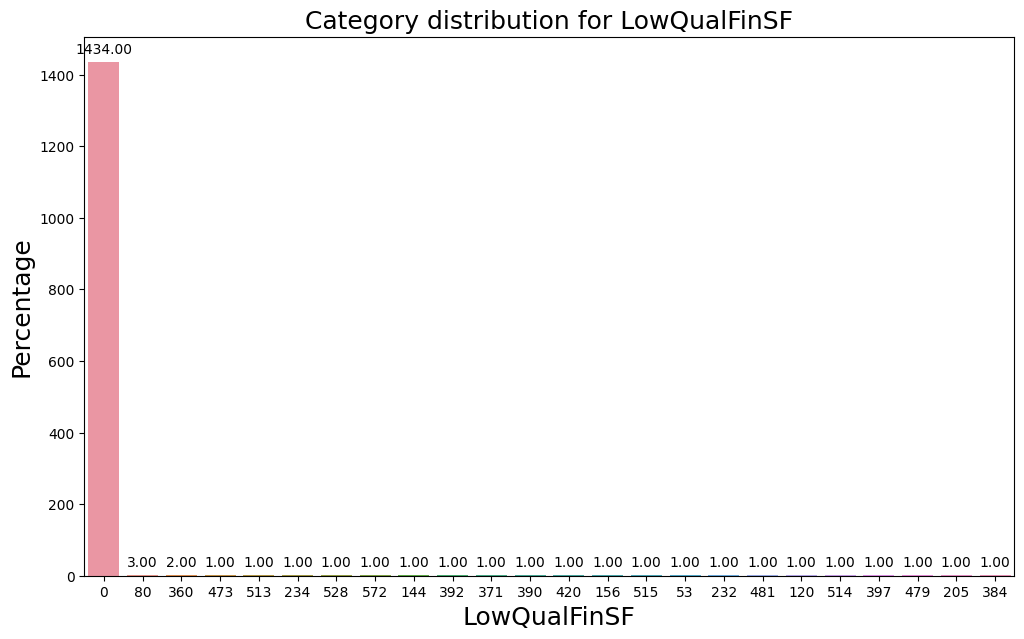

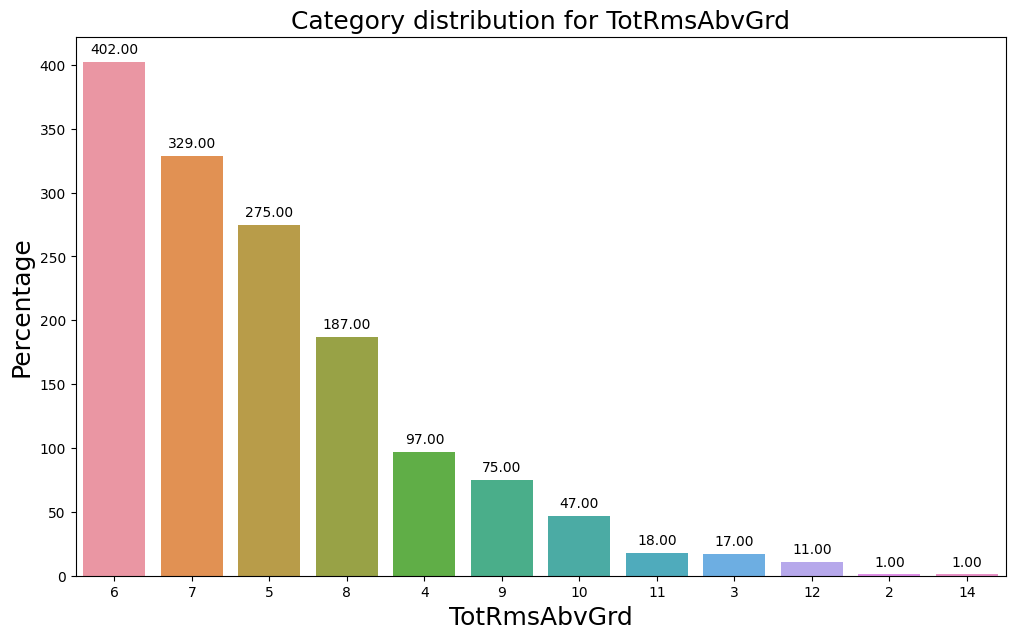

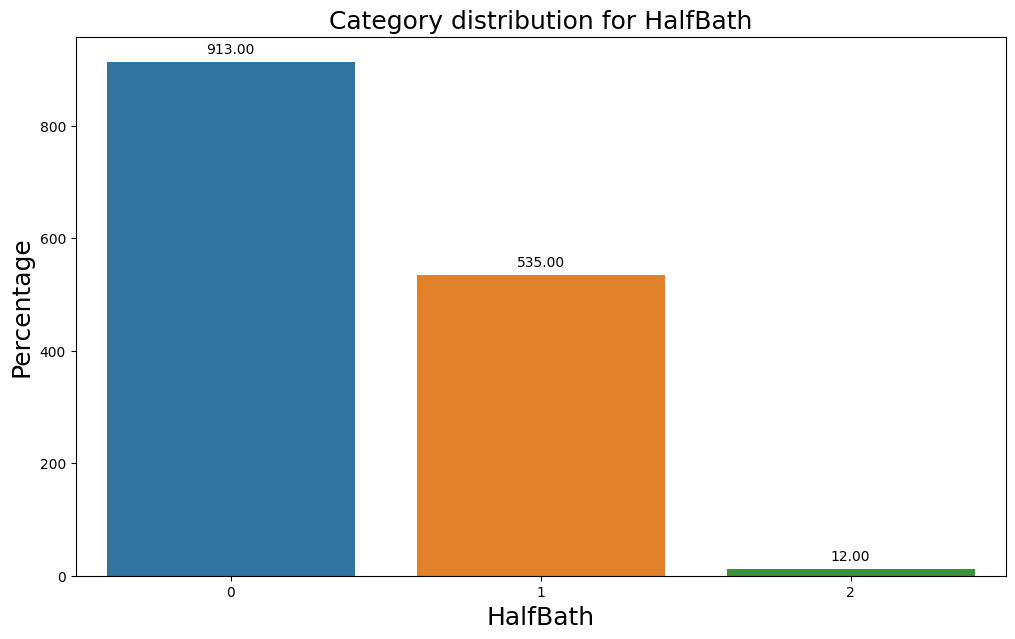

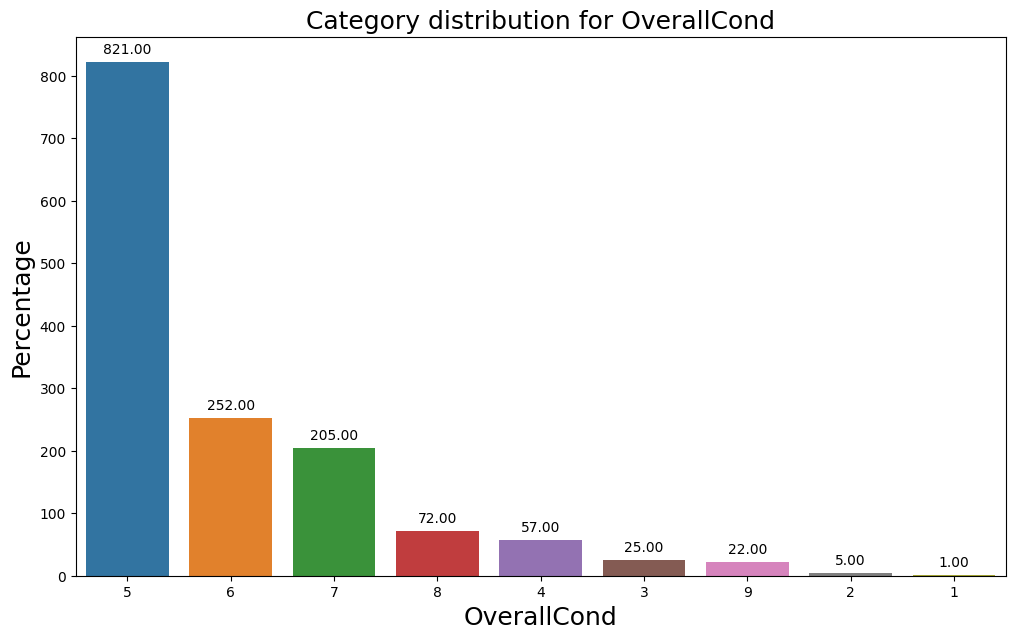

In [31]:
for feature in ordinal_vars:
    plot_categorical_feature(data, feature)

As is visible from the above plots some of the Discrete features like `LowQualFinSF`, `MiscVal`, `PoolArea`, `3SsnPorch`, `smtHalfBath`, `KitchenAbvGr` have highly skewed category distribution. We should drop them as the dominant category can influence our model coefficients

In [32]:
ordinal_vars = list(set(ordinal_vars) - set(['LowQualFinSF', 'MiscVal', 'PoolArea', '3SsnPorch', 'BsmtHalfBath', 'KitchenAbvGr']))

The SalePrice feature has some positive skew and has outliers.<br>
In order to avoid issues explained above, we will take a Log Transformation of the target column.

In [33]:
data['SalePrice'] = np.log(data.SalePrice)

## Feature Engineering

The goal of feature engineering is to provide the linear regression model with more informative and relevant features, which can lead to better model accuracy and generalization.

### Encoding Categorical Variables

In [34]:
# Remove reddundant values
data = data[list(continous_vars) + list(ordinal_vars) + list(categorical_vars)]

# create copy
data_modeling = data.copy()

# convert categorical vars to one-hot
ohe_categorical_vars = list(set(categorical_vars) - set(year_features))

In [35]:
dummies_df = pd.get_dummies(data_modeling[ohe_categorical_vars], drop_first=True)

In [36]:
data_modeling.drop(ohe_categorical_vars, inplace=True, axis=1)

In [37]:
# concat dummy variables with X
data_modeling = pd.concat([data_modeling, dummies_df], axis=1)

#### Split into train and test sets

We will now split our data into training and testing sets for modelling

In [38]:
from sklearn.model_selection import GridSearchCV, train_test_split

In [39]:
y = data_modeling.pop('SalePrice')
X = data_modeling

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [40]:
X_train.shape, X_test.shape

((978, 224), (482, 224))

### Scaling Numerical Features

In [41]:
features_to_be_scaled = [feature for feature in ordinal_vars+continous_vars if feature != 'SalePrice']

In [42]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

In [43]:
scaler = MinMaxScaler()
X_train[features_to_be_scaled] = scaler.fit_transform(X_train[features_to_be_scaled])
X_test[features_to_be_scaled] = scaler.transform(X_test[features_to_be_scaled])

## Model Building

We will first create our Baseline models with all features using

1. Linear Regression
2. Lasso 
3. Ridge 


In [44]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score

In [45]:
# linear regression
lm = LinearRegression()
lasso_model = Lasso()
ridge_model = Ridge()

In [46]:
def fit_evalaute_one_model(model, X_train, X_test, y_train, y_test):
    scores = {}
    model.fit(X_train,y_train)
    y_train_preds = model.predict(X_train)
    training_r2 = r2_score(y_true=y_train, y_pred=y_train_preds)
    y_test_preds = model.predict(X_test)
    testing_r2 = r2_score(y_true=y_test, y_pred=y_test_preds)
    scores['model'] = str(model.__class__).split('.')[-1][:-2]
    scores['training_r2'] = training_r2
    scores['testing_r2'] = testing_r2
    return model,scores

In [47]:
def fit_evalaute_models(model_list, X_train, X_test, y_train, y_test):
    scores_df = pd.DataFrame()
    for model in model_list:
        _,scores = fit_evalaute_one_model(model,X_train,X_test,y_train,y_test)
        print(scores)
        scores_df = scores_df.append(scores,ignore_index=True)
    return scores_df

# Initial Scores
scores_df = fit_evalaute_models([lm,lasso_model,ridge_model],X_train,X_test,y_train,y_test)

{'model': 'LinearRegression', 'training_r2': 0.9262865328129076, 'testing_r2': -2.032623989475707e+16}
{'model': 'Lasso', 'training_r2': 0.3957499968637862, 'testing_r2': 0.40270402909583836}
{'model': 'Ridge', 'training_r2': 0.9225146218247549, 'testing_r2': 0.8741452000879077}


In [48]:
# Scores for all models
scores_df.head()

model  training_r2    testing_r2
0  LinearRegression     0.926287 -2.032624e+16
1             Lasso     0.395750  4.027040e-01
2             Ridge     0.922515  8.741452e-01

<Axes: xlabel='model'>

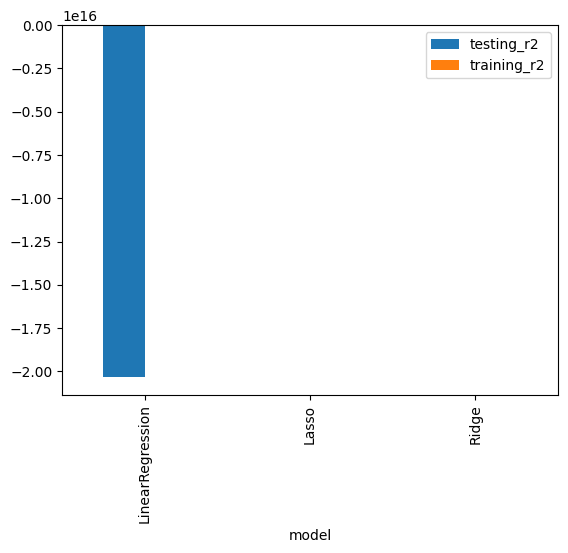

In [49]:
scores_df.plot(x="model", y=["testing_r2", "training_r2"], kind="bar")

### Feature Selection

We will peform RFE, followed by feature selection using p-value and VIF.<br>
We can then use the remaining features to create Ridge/Lasso models and perform hyperparameter tuning.

As we have 224 features, we will start with 75 features using RFE.

In [50]:
from sklearn.feature_selection import RFE

In [51]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=70)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [52]:
pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=["Column", "Included?", "Rank"]).sort_values("Rank")

Column  Included?  Rank
0                GrLivArea       True     1
102        Condition1_RRNn       True     1
100        Condition1_RRAn       True     1
96         Condition1_Norm       True     1
94         GarageType_None       True     1
86       GarageFinish_None       True     1
85         LandContour_Lvl       True     1
84         LandContour_Low       True     1
83         LandContour_HLS       True     1
82        BsmtFinType1_Unf       True     1
80       BsmtFinType1_None       True     1
76       BsmtExposure_None       True     1
73         BsmtExposure_Gd       True     1
66       HouseStyle_2.5Unf       True     1
62             MSZoning_RM       True     1
61             MSZoning_RL       True     1
60             MSZoning_RH       True     1
59             MSZoning_FV       True     1
57           GarageCond_Po       True     1
56         GarageCond_None       True     1
105           HeatingQC_Po       True     1
51            CentralAir_Y       True     1
110          GarageQual_Fa       True     1
113          GarageQual_Po       True     1
220    Exterior2nd_Wd Sdng       True     1
215      Exterior2nd_Other       True     1
210     Exterior2nd_CBlock       True     1
204          BsmtCond_None       True     1
199       Foundation_PConc       True     1
180          BsmtQual_None       True     1
175      BsmtFinType2_None       True     1
170         Functional_Sev       True     1
166        Functional_Maj2       True     1
151    Exterior1st_Wd Sdng       True     1
149     Exterior1st_Stucco       True     1
142     Exterior1st_CBlock       True     1
141    Exterior1st_BrkFace       True     1
136   Neighborhood_StoneBr       True     1
130   Neighborhood_NridgHt       True     1
129   Neighborhood_NoRidge       True     1
120   Neighborhood_Crawfor       True     1
118   Neighborhood_ClearCr       True     1
114          GarageQual_TA       True     1
112        GarageQual_None       True     1
47    SaleCondition_Alloca       True     1
223             Alley_Pave       True     1
10               BsmtUnfSF       True     1
24             OverallCond       True     1
22            TotRmsAbvGrd       True     1
19              MSSubClass       True     1
18            BsmtFullBath       True     1
16              GarageCars       True     1
15                FullBath       True     1
14             OverallQual       True     1
32       RoofStyle_Mansard       True     1
13             LotFrontage       True     1
12              BsmtFinSF1       True     1
34            SaleType_CWD       True     1
35            SaleType_Con       True     1
9               WoodDeckSF       True     1
36          SaleType_ConLD       True     1
7                 2ndFlrSF       True     1
23                HalfBath       True     1
5              TotalBsmtSF       True     1
4              ScreenPorch       True     1
39            SaleType_New       True     1
44          BldgType_Twnhs       True     1
40            SaleType_Oth       True     1
3                  LotArea       True     1
1               BsmtFinSF2       True     1
140    Exterior1st_BrkComm      False     2
54           GarageCond_Fa      False     3
171         Functional_Typ      False     4
49    SaleCondition_Normal      False     5
161         KitchenQual_TA      False     6
207    Exterior2nd_AsphShn      False     7
159         KitchenQual_Fa      False     8
160         KitchenQual_Gd      False     9
38          SaleType_ConLw      False    10
121   Neighborhood_Edwards      False    11
103           HeatingQC_Fa      False    12
202        Foundation_Wood      False    13
192       FireplaceQu_None      False    14
172       BsmtFinType2_BLQ      False    15
124   Neighborhood_MeadowV      False    16
92      GarageType_CarPort      False    17
115   Neighborhood_Blueste      False    18
211    Exterior2nd_CmentBd      False    19
111          GarageQual_Gd      False    20
58           GarageCond_TA      False    21
55           Gar

In [53]:
not_selected_cols = X_train.columns[~rfe.support_]
print(f'The unselected columns after RFE are: {list(not_selected_cols)}') 

'BsmtUnfSF' in not_selected_cols

The unselected columns after RFE are: ['EnclosedPorch', 'MasVnrArea', 'GarageArea', 'OpenPorchSF', 'BedroomAbvGr', 'Fireplaces', 'MoSold', 'YrSold', 'YearRemodAdd', 'GarageYrBlt', 'YearBuilt', 'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Shed', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_WD', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_TwnhsE', 'SaleCondition_AdjLand', 'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial', 'PavedDrive_P', 'PavedDrive_Y', 'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_TA', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2Story', 'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone', 'BsmtExposure_Mn', 'BsmtExposure_No', 'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ', 'BsmtFinType1_Rec', 'GarageFinish_RFn', 'GarageFinish_Unf', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_D

False

In [54]:
col = X_train.columns[rfe.support_]
print(f'The selected columns after RFE are: {list(col)}')

The selected columns after RFE are: ['GrLivArea', 'BsmtFinSF2', 'LotArea', 'ScreenPorch', 'TotalBsmtSF', '2ndFlrSF', 'WoodDeckSF', 'BsmtUnfSF', 'BsmtFinSF1', 'LotFrontage', 'OverallQual', 'FullBath', 'GarageCars', 'BsmtFullBath', 'MSSubClass', 'TotRmsAbvGrd', 'HalfBath', 'OverallCond', 'RoofStyle_Mansard', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_New', 'SaleType_Oth', 'BldgType_Twnhs', 'SaleCondition_Alloca', 'CentralAir_Y', 'GarageCond_None', 'GarageCond_Po', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'HouseStyle_2.5Unf', 'BsmtExposure_Gd', 'BsmtExposure_None', 'BsmtFinType1_None', 'BsmtFinType1_Unf', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'GarageFinish_None', 'GarageType_None', 'Condition1_Norm', 'Condition1_RRAn', 'Condition1_RRNn', 'HeatingQC_Po', 'GarageQual_Fa', 'GarageQual_None', 'GarageQual_Po', 'GarageQual_TA', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Ston

In [55]:
# Extract features selected by RFE
X_train_rfe = X_train[col]

In [56]:
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [57]:
def fit_linear_model(df, labels):
    df_with_const = sm.add_constant(df)
    lm = sm.OLS(labels, df_with_const).fit()   # Running the linear model
    return lm 

def get_vif_for_features(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [58]:
# Fit the linear OLS model and get summary statistics
model = None

def create_and_show_model_statistics(features, labels, PRINT_RESULT=False):
    global model
    model = fit_linear_model(features, labels)
    if PRINT_RESULT:
        print(model.summary())
        print("\n" + "=" * 100 + "\n")
        print("Variance Inflation Factor of Features")
        print("-" * 50)
        print(get_vif_for_features(features))

create_and_show_model_statistics(features=X_train_rfe, labels=y_train, PRINT_RESULT=True)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     133.0
Date:                Sun, 20 Aug 2023   Prob (F-statistic):               0.00
Time:                        23:30:45   Log-Likelihood:                 646.08
No. Observations:                 978   AIC:                            -1168.
Df Residuals:                     916   BIC:                            -865.3
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   10.4376 

                Features    VIF
35     BsmtExposure_None    inf
27       GarageCond_None    inf
66    Exterior2nd_CBlock    inf
65         BsmtCond_None    inf
4            TotalBsmtSF    inf
63         BsmtQual_None    inf
62     BsmtFinType2_None    inf
7              BsmtUnfSF    inf
8             BsmtFinSF1    inf
57    Exterior1st_CBlock    inf
48       GarageQual_None    inf
42       GarageType_None    inf
41     GarageFinish_None    inf
36     BsmtFinType1_None    inf
1             BsmtFinSF2    inf
31           MSZoning_RL  97.62
0              GrLivArea  84.16
50         GarageQual_TA  55.39
10           OverallQual  46.55
15          TotRmsAbvGrd  33.80
40       LandContour_Lvl  25.42
11              FullBath  24.90
17           OverallCond  24.44
26          CentralAir_Y  21.34
12            GarageCars  20.06
32           MSZoning_RM  19.70
5               2ndFlrSF  14.17
9            LotFrontage   9.58
43       Condition1_Norm   9.34
29           MSZoning_FV   7.22
59   Ext

In [59]:
def drop_column_manually(column):
    global X_train_rfe
    vif = get_vif_for_features(X_train_rfe)
    vif_cols = vif[vif['VIF'] > 5]['Features'].values.tolist()
    highest_pVal = pd.DataFrame(model.pvalues, columns=["pValue"])
    highest_pVal['index1'] = highest_pVal.index
    highest_pVal_cols = highest_pVal.sort_values("pValue", ascending=False)[highest_pVal['pValue'] > 0.05]['index1'].values.tolist()
    print("Removing {} feature with pValue:{} and VIF:{}".format(
        column,
        round(highest_pVal[highest_pVal['index1'] == column]['pValue'].values[0], 5),
        round(vif[vif['Features'] == column]['VIF'].values[0], 5)
    ))
    X_train_rfe = X_train_rfe.drop([column], axis=1)
    create_and_show_model_statistics(features=X_train_rfe, labels=y_train, PRINT_RESULT=False)

In [60]:
drop_column_manually('Exterior2nd_CBlock')

Removing Exterior2nd_CBlock feature with pValue:0.56621 and VIF:inf


In [61]:
drop_column_manually('GarageType_None')

Removing GarageType_None feature with pValue:0.0019 and VIF:inf


In [62]:
drop_column_manually('GarageFinish_None')

Removing GarageFinish_None feature with pValue:0.0019 and VIF:inf


In [63]:
drop_column_manually('GarageQual_None')

Removing GarageQual_None feature with pValue:0.0019 and VIF:inf


In [64]:
drop_column_manually('GarageCond_None')

Removing GarageCond_None feature with pValue:0.0019 and VIF:4.69


In [65]:
create_and_show_model_statistics(features=X_train_rfe, labels=y_train, PRINT_RESULT=True)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     133.8
Date:                Sun, 20 Aug 2023   Prob (F-statistic):               0.00
Time:                        23:31:05   Log-Likelihood:                 640.93
No. Observations:                 978   AIC:                            -1160.
Df Residuals:                     917   BIC:                            -861.8
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   10.3094 

In [66]:
print(f'After using RFE and some amount of manual feature selection we have {len(X_train_rfe.columns)} features remaining.')

After using RFE and some amount of manual feature selection we have 65 features remaining.


## Hyperparameter Tuning

In [67]:
from sklearn.model_selection import KFold

In [68]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge()
lasso = Lasso()

def tune_paramters_for_model(model, params, log_scale=False):
    # cross validation
    folds = KFold(n_splits=5,shuffle=True,random_state=42)
    # folds = 5
    model_cv = GridSearchCV(estimator = model, 
                            param_grid = params, 
                            scoring= 'r2', 
                            cv = folds, 
                            return_train_score=True,
                            verbose = 1)            
    model_cv.fit(X_train_rfe, y_train) 
    cv_results = pd.DataFrame(model_cv.cv_results_)
    cv_results = cv_results[cv_results['param_alpha']<=200]
    # plotting mean test and train scoes with alpha 
    cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
    # plotting
    plt.figure(figsize=(10,7))
    plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
    plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
    plt.xlabel('alpha')
    plt.ylabel('R2 Score')
    plt.title(f"Negative Mean Absolute Error and alpha for {str(model.__class__).split('.')[-1][:-2]} Model")
    plt.legend(['train score', 'test score'], loc='upper right')
    if log_scale:
        plt.xscale('log')
    plt.show()
    return cv_results, model_cv

Fitting 5 folds for each of 28 candidates, totalling 140 fits


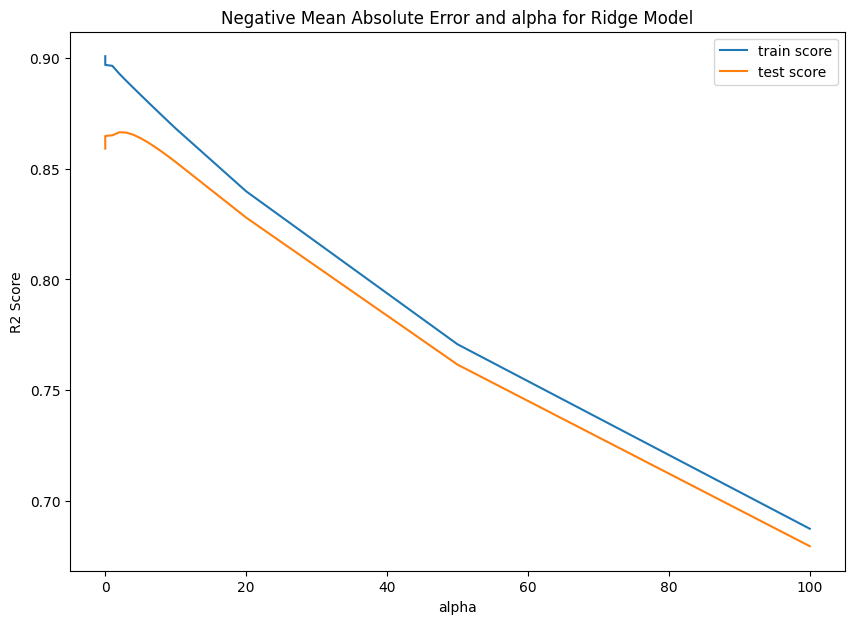

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0        0.006798      0.002229         0.002804        0.000401            0   
1        0.008004      0.004645         0.002799        0.000398            0   
2        0.008399      0.003927         0.002804        0.000398            0   
3        0.004798      0.000396         0.002602        0.000486            0   
4        0.004798      0.000751         0.003403        0.001017            0   
5        0.005000      0.000630         0.003201        0.000397            0   
6        0.007597      0.002871         0.003402        0.000490            0   
7        0.006398      0.001017         0.003202        0.000398            0   
8        0.007199      0.001720         0.003401        0.000800            0   
9        0.005000      0.000003         0.002798        0.000401            0   
10       0.004998      0.000894         0.002403        0.000487            0   
11       0.004399      0.000487         0.002203        0.000402            0   
12       0.009396      0.005886         0.003002        0.000630            0   
13       0.007597      0.001627         0.003603        0.001740            1   
14       0.004796      0.000400         0.002405        0.000489            2   
15       0.004000      0.000632         0.002600        0.000486            3   
16       0.005599      0.000799         0.002803        0.000399            4   
17       0.005001      0.001093         0.002600        0.000485            5   
18       0.005199      0.000398         0.002601        0.000488            6   
19       0.005997      0.001097         0.003602        0.000489            7   
20       0.004599      0.000490         0.002706        0.000395            8   
21       0.004797      0.000401         0.002801        0.000398            9   
22       0.004795      0.000751         0.002204        0.000399           10   
23       0.004399      0.001018         0.002400        0.000488           20   
24       0.008397      0.005350         0.003000        0.000629           50   
25       0.004598      0.000489         0.002602        0.000488          100   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}           0.887954           0.778994   
1    {'alpha': 0.001}           0.887966           0.778996   
2     {'alpha': 0.01}           0.888089           0.779027   
3     {'alpha': 0.05}           0.888578           0.779266   
4      {'alpha': 0.1}           0.889094           0.779741   
5      {'alpha': 0.2}           0.889919           0.781039   
6      {'alpha': 0.3}           0.890574           0.782559   
7      {'alpha': 0.4}           0.891117           0.784146   
8      {'alpha': 0.5}           0.891578           0.785725   
9      {'alpha': 0.6}           0.891976           0.787257   
10     {'alpha': 0.7}           0.892322           0.788726   
11     {'alpha': 0.8}           0.892624           0.790125   
12     {'alpha': 0.9}           0.892889           0.791451   
13     {'alpha': 1.0}           0.893120           0.792705   
14     {'alpha': 2.0}           0.894223           0.802056   
15     {'alpha': 3.0}           0.894047           0.807619   
16     {'alpha': 4.0}           0.893191           0.811077   
17     {'alpha': 5.0}           0.891909           0.813232   
18     {'alpha': 6.0}           0.890341           0.814509   
19     {'alpha': 7.0}           0.888568           0.815161   
20     {'alpha': 8.0}           0.886646           0.815349   
21     {'alpha': 9.0}           0.884612           0.815180   
22    {'alpha': 10.0}           0.882494           0.814730   
23      {'alpha': 20}           0.859576           0.802579   
24      {'alpha': 50}           0.795971           0.750748   
25     {'alpha': 100}           0.715025           0.675532   

    split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0            0.873106           0.

In [69]:
# Tune Ridge Model
ridge_cv_results, ridge_cv_model = tune_paramters_for_model(ridge, params)
ridge_cv_results

In [70]:
print(f'The best value of alpha for Ridge model is {ridge_cv_model.best_params_} and best score is {ridge_cv_model.best_score_}')

The best value of alpha for Ridge model is {'alpha': 2.0} and best score is 0.8663836835584501


Fitting 5 folds for each of 28 candidates, totalling 140 fits


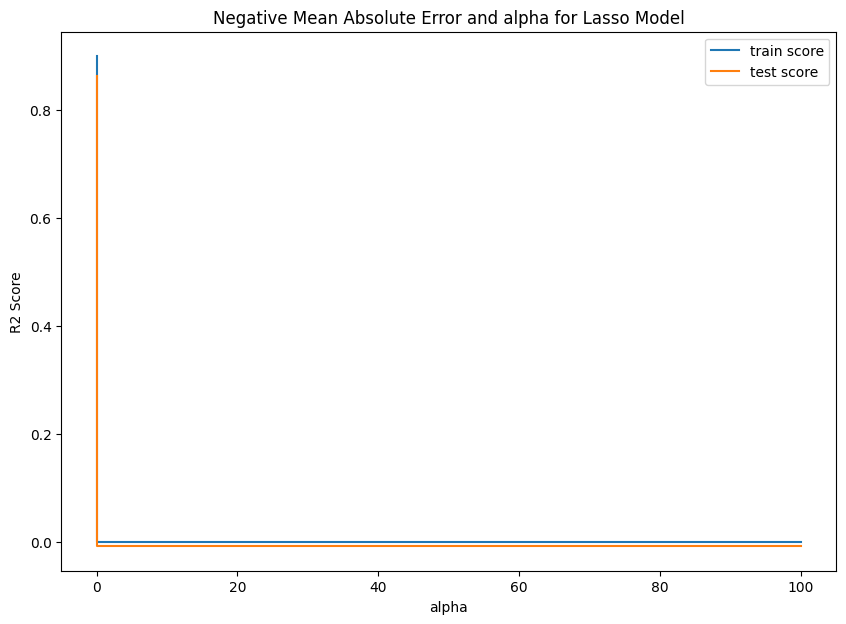

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0        0.056200      0.020762         0.003200        0.000403            0   
1        0.007999      0.002097         0.003799        0.000402            0   
2        0.005802      0.000745         0.002595        0.000491            0   
3        0.004998      0.000628         0.002799        0.000743            0   
4        0.004998      0.000896         0.002599        0.000489            0   
5        0.004997      0.000630         0.002404        0.000489            0   
6        0.004602      0.000800         0.002795        0.000398            0   
7        0.005397      0.000492         0.003000        0.000004            0   
8        0.004999      0.001262         0.002799        0.000396            0   
9        0.013998      0.015113         0.009000        0.007590            0   
10       0.006201      0.001327         0.002906        0.000497            0   
11       0.003997      0.000636         0.002201        0.000747            0   
12       0.004798      0.001328         0.002003        0.000894            0   
13       0.004598      0.000804         0.002401        0.001020            1   
14       0.005199      0.000979         0.002999        0.000632            2   
15       0.005201      0.000401         0.003198        0.000395            3   
16       0.008197      0.005420         0.004401        0.002333            4   
17       0.005002      0.000630         0.004595        0.003200            5   
18       0.004801      0.000398         0.003001        0.000005            6   
19       0.005200      0.001323         0.003598        0.000800            7   
20       0.006000      0.002007         0.003803        0.000405            8   
21       0.007401      0.002158         0.003400        0.000488            9   
22       0.005199      0.000745         0.003403        0.001016           10   
23       0.010797      0.004115         0.003800        0.000751           20   
24       0.008598      0.003609         0.006202        0.003968           50   
25       0.007004      0.002606         0.021002        0.035000          100   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}           0.895706           0.779983   
1    {'alpha': 0.001}           0.890673           0.788713   
2     {'alpha': 0.01}           0.797119           0.721591   
3     {'alpha': 0.05}           0.220101           0.181983   
4      {'alpha': 0.1}          -0.004676          -0.001587   
5      {'alpha': 0.2}          -0.004676          -0.001587   
6      {'alpha': 0.3}          -0.004676          -0.001587   
7      {'alpha': 0.4}          -0.004676          -0.001587   
8      {'alpha': 0.5}          -0.004676          -0.001587   
9      {'alpha': 0.6}          -0.004676          -0.001587   
10     {'alpha': 0.7}          -0.004676          -0.001587   
11     {'alpha': 0.8}          -0.004676          -0.001587   
12     {'alpha': 0.9}          -0.004676          -0.001587   
13     {'alpha': 1.0}          -0.004676          -0.001587   
14     {'alpha': 2.0}          -0.004676          -0.001587   
15     {'alpha': 3.0}          -0.004676          -0.001587   
16     {'alpha': 4.0}          -0.004676          -0.001587   
17     {'alpha': 5.0}          -0.004676          -0.001587   
18     {'alpha': 6.0}          -0.004676          -0.001587   
19     {'alpha': 7.0}          -0.004676          -0.001587   
20     {'alpha': 8.0}          -0.004676          -0.001587   
21     {'alpha': 9.0}          -0.004676          -0.001587   
22    {'alpha': 10.0}          -0.004676          -0.001587   
23      {'alpha': 20}          -0.004676          -0.001587   
24      {'alpha': 50}          -0.004676          -0.001587   
25     {'alpha': 100}          -0.004676          -0.001587   

    split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0            0.878783           0.

In [71]:
# Tune Lasso Model
lasso_cv_results, lasso_cv_model = tune_paramters_for_model(lasso, params)
lasso_cv_results

In [72]:
print(f'The best value of alpha for Lasso model is {lasso_cv_model.best_params_} and best score is {lasso_cv_model.best_score_}')

The best value of alpha for Lasso model is {'alpha': 0.0001} and best score is 0.8620305547549535


## Model Evaluation

In [73]:
X_test_rfe = X_test[X_train_rfe.columns]

In [74]:
lasso_model = Lasso(alpha = lasso_cv_model.best_params_['alpha'])
print('Training Lasso Model with optimal alpha......')
print()
model, scores = fit_evalaute_one_model(lasso_model, X_train_rfe, X_test_rfe, y_train, y_test)
print(f'Results: {scores}')

Training Lasso Model with optimal alpha......

Results: {'model': 'Lasso', 'training_r2': 0.8960843172516155, 'testing_r2': 0.8819119070830242}


In [75]:
ridge_model = Ridge(alpha=ridge_cv_model.best_params_['alpha'])
print('Training Ridge Model with optimal alpha......')
print()
model, scores = fit_evalaute_one_model(ridge_model, X_train_rfe, X_test_rfe, y_train, y_test)
print(f'Results: {scores}')

Training Ridge Model with optimal alpha......

Results: {'model': 'Ridge', 'training_r2': 0.8910903944862422, 'testing_r2': 0.8731733983237089}


We can see that Lasso produces the best score on the test set. <br>
Moreover the difference in R2 Score between training and testing is not too much and also it can help in feature selection.

We will choose Lasso as our final model.

## Result

In [76]:
def interpret_model(model,hide_zero_coef=True):
    model_parameters = list(model.coef_)
    model_parameters.insert(0, model.intercept_)
    model_parameters = [round(x, 3) for x in model_parameters]
    cols = X_train_rfe.columns
    cols = cols.insert(0, "constant")
    model_coefficients = pd.DataFrame(list(zip(cols,model_parameters)))
    model_coefficients.columns = ['Feature','Coef']
    if hide_zero_coef:
        model_coefficients = model_coefficients[model_coefficients.Coef !=  0]
    plt.figure(figsize=(18,11))
    
    splot = sns.barplot(y = model_coefficients[model_coefficients.Feature!='constant'].Coef,x = model_coefficients[model_coefficients.Feature!='constant'].Feature)
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.2f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')
    
    plt.title(f"Feature Importance for {str(model.__class__).split('.')[-1][:-2]}",fontsize = 20)
    plt.xlabel(xlabel = 'Features',fontsize = 18)
    plt.ylabel(ylabel = 'Coefficients',fontsize = 18)
    plt.yticks(fontsize = 14 )
    plt.xticks(rotation = 90)
    plt.show()
    return model_coefficients

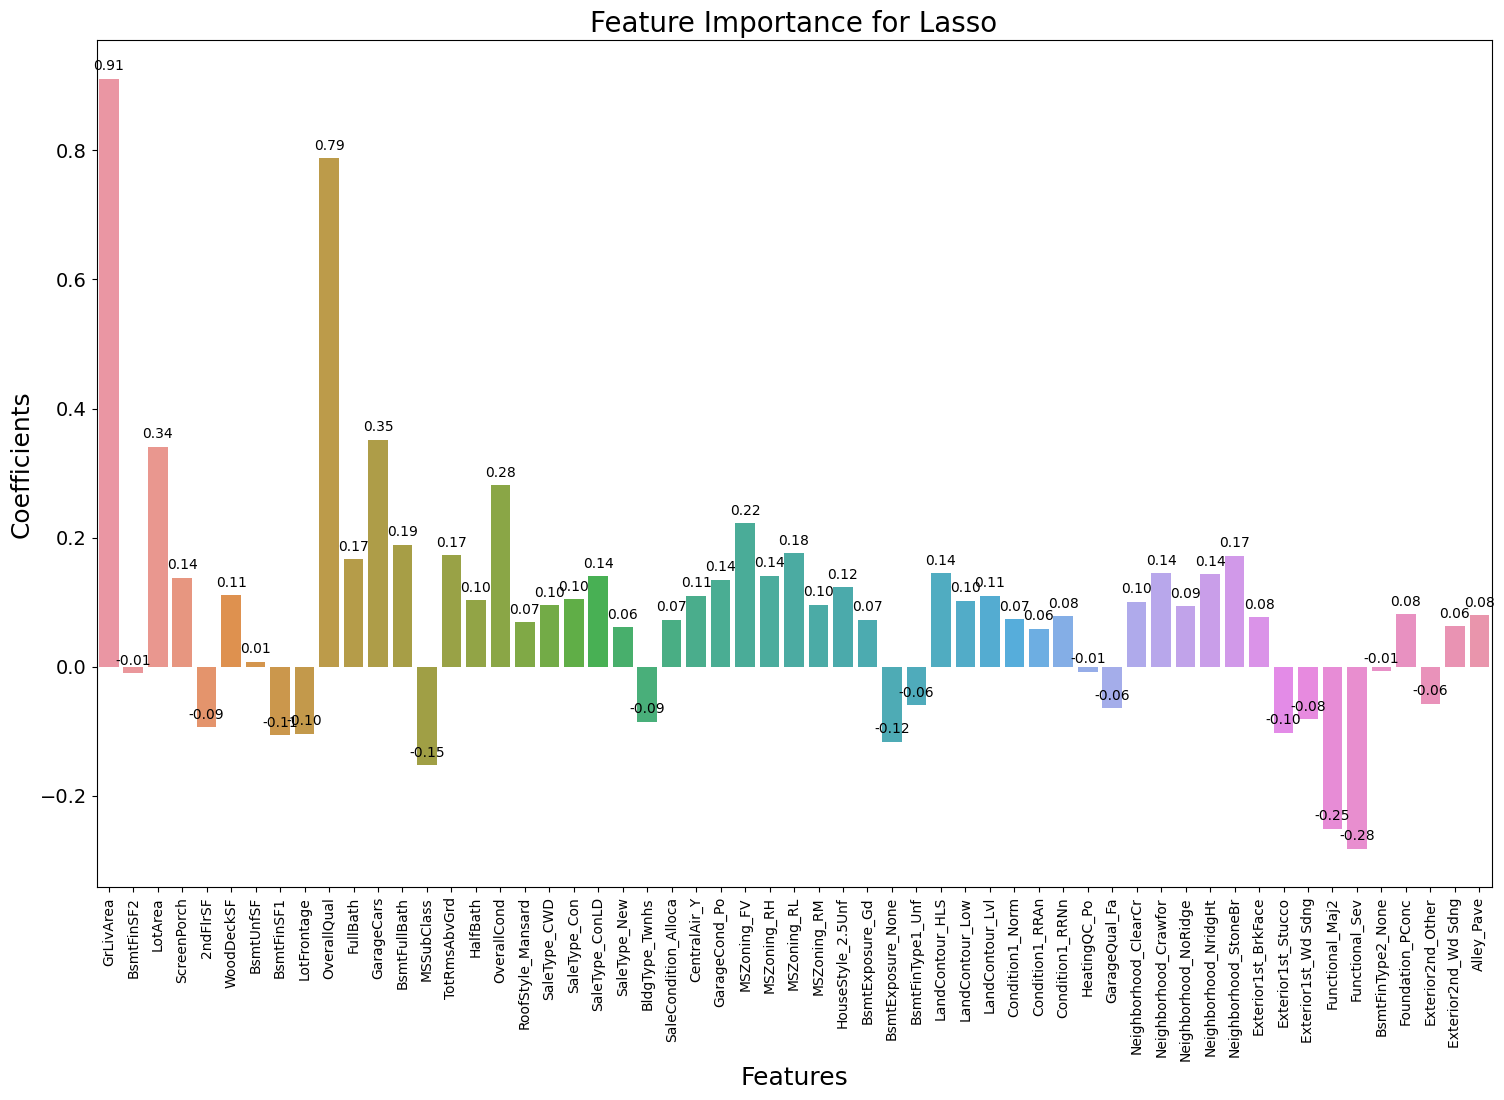

In [77]:
# Interpret Lasso Model
lasso_model_coefficients = interpret_model(lasso_model)

From the above plot we can interpret that the features like `GrLivArea` and `OverallQual` have a positive impact on the SalePrice.

Features like `Functional_Sev` have a negative effect on the `SalePrice`.

In [78]:
# Top Features that define a high SalePrice.
lasso_model_coefficients.sort_values(by='Coef',ascending=False).head(10)

Feature    Coef
0       constant  10.419
1      GrLivArea   0.911
11   OverallQual   0.788
13    GarageCars   0.352
3        LotArea   0.341
18   OverallCond   0.281
29   MSZoning_FV   0.222
14  BsmtFullBath   0.189
31   MSZoning_RL   0.176
16  TotRmsAbvGrd   0.173

The top 5 Lasso selected features that define a high `SalePrice` are:

1. __`GrLivArea`__ 
2. __`OverallQual`__
3. __`GarageCars`__
4. __`OverallCond`__
5. __`LotArea`__

# SUBJECTIVE QUESTIONS

# Question 1
**What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?**

In [79]:
optimal_ridge_alpha = ridge_cv_model.best_params_['alpha']
md("Optimal value of alpha for ridge regression: {} ".format(optimal_ridge_alpha))

Optimal value of alpha for ridge regression: 2.0 

In [80]:
optimal_lasso_alpha = lasso_cv_model.best_params_['alpha']
md("Optimal value of alpha for lasso regression: {}".format(optimal_lasso_alpha))

Optimal value of alpha for lasso regression: 0.0001

In [81]:
ridge_model = Ridge(alpha=optimal_ridge_alpha*2)
print('Training Ridge Model with double the optimal alpha.')
model, scores = fit_evalaute_one_model(ridge_model, X_train_rfe, X_test_rfe, y_train, y_test)
print(f'Results: {scores}')

Training Ridge Model with double the optimal alpha.
Results: {'model': 'Ridge', 'training_r2': 0.8861410826958362, 'testing_r2': 0.8701201186015464}


In [82]:
lasso_model = Lasso(alpha=optimal_lasso_alpha*2)
print('Training Lasso Model with double the optimal alpha.')
model, scores = fit_evalaute_one_model(lasso_model, X_train_rfe, X_test_rfe, y_train, y_test)
print(f'Results: {scores}')

Training Lasso Model with double the optimal alpha.
Results: {'model': 'Lasso', 'training_r2': 0.8934820365610522, 'testing_r2': 0.8792710649451847}


**We can see that the testing r2 score of both lasso and ridge decreases when the optimum alpha value is doubled.**

Testing R2 score of ridge decreased from `0.87` to `0.86` while testing R2 score of lasso decreased from `0.88` to `0.87`

# Question 2

**You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?**

After finding the optimal values of alpha for both RIDGE and LASSSO, we compare both their best scores using `model.best_score_` and pick which ever gives the highest value. In our case, the best score for lasso is *0.8806* and the best score for ridge is  *0.8705*. 

Moreover the difference in R2 Score between training and testing is not too much and also it can help in feature selection.

Hence we pick LASSO as it gives a better score compared to RIDGE on the testing data.

# Question 3

**After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?**

The top 5 Lasso selected features that define a high `SalePrice` are:

1. __`GrLivArea`__ 
2. __`OverallQual`__
3. __`GarageCars`__
4. __`OverallCond`__
5. __`LotArea`__

In [83]:
# Build lasso model without the top features
X_train_rfe = X_train_rfe.drop(columns=['GrLivArea','OverallQual','GarageCars','OverallCond','LotArea'])
X_test_rfe = X_test_rfe.drop(columns=['GrLivArea','OverallQual','GarageCars','OverallCond','LotArea'])

In [84]:
lasso_model_new_variables = Lasso(alpha = 0.001)
print('Training Lasso Model with optimal alpha......')
print()
model,scores = fit_evalaute_one_model(lasso_model_new_variables,X_train_rfe, X_test_rfe, y_train, y_test)
print(f'Results: {scores}')

Training Lasso Model with optimal alpha......

Results: {'model': 'Lasso', 'training_r2': 0.7979388866167265, 'testing_r2': 0.8119394500682662}


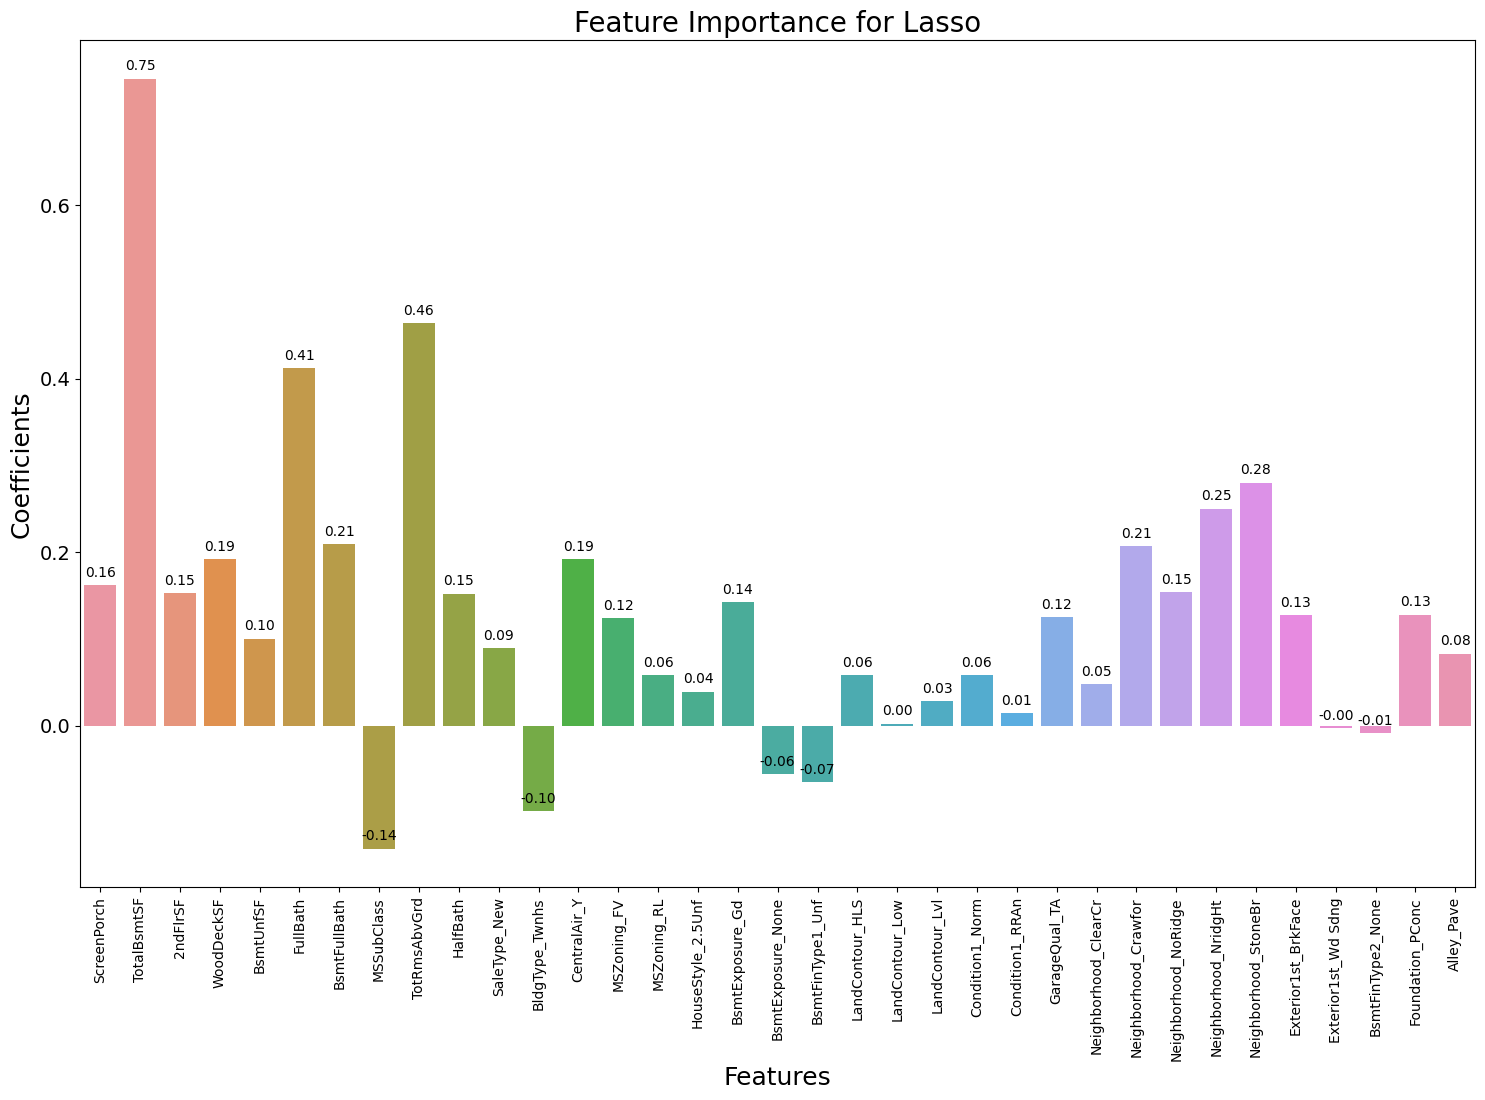

Feature    Coef
0               constant  10.889
3            TotalBsmtSF   0.746
12          TotRmsAbvGrd   0.464
9               FullBath   0.412
47  Neighborhood_StoneBr   0.280
46  Neighborhood_NridgHt   0.250
10          BsmtFullBath   0.209
44  Neighborhood_Crawfor   0.207
22          CentralAir_Y   0.192
5             WoodDeckSF   0.192

In [85]:
lasso_model_new_variables = interpret_model(lasso_model_new_variables)
# taking into consideration the negative values as well.
lasso_model_new_variables['Coef'] = lasso_model_new_variables['Coef'].abs()
lasso_model_new_variables.sort_values(by='Coef',ascending=False).head(10)

The 5 most important features that define a high `SalePrice` **now** are:

1. __`TotalBsmtSF`__ 
2. __`TotRmsAbvGrd`__
3. __`FullBath`__
4. __`Neighborhood_StoneBr`__
5. __`Neighborhood_NridgHt`__

# Question 4

**How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?**

When working with advanced linear regression techniques like Lasso and Ridge, there are several strategies you can employ to achieve robustness and generalizability:

* **Feature Selection and Regularization:** Lasso and Ridge regression are regularization techniques that help prevent overfitting by adding a penalty term to the linear regression loss function.

* **Cross-Validation:** Use techniques like k-fold cross-validation just as used in this project to assess the model's performance on multiple subsets of the data.

* **Scaling:** Scaling features can help prevent the dominance of certain features due to their different scales. Standardizing features ensures that the regularization terms in Lasso and Ridge are applied consistently across all features, promoting better convergence and generalization.

The **implications** of robustness and generalizability for the accuracy of a model are that a robust model is less likely to make mistakes due to noise or outliers, and a generalizable model is more likely to make accurate predictions on new data.

For example, if a model is not robust, it may make inaccurate predictions if the data it is tested on contains noise or outliers. Similarly, if a model is not generalizable, it may make inaccurate predictions on new data that is different from the training data.

Therefore, it is important to make sure that a model is both robust and generalizable in order to **maximize** its accuracy.